# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer # Corrected typo
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Cek penggunaan memori sebelum optimasi
print(f"Ukuran awal: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Konversi float64 ke float32
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')

# Konversi int64 ke tipe int yang lebih kecil
for col in df.select_dtypes(include=['int64']).columns:
    # Coba ubah ke int32, jika error (karena nilai terlalu besar), biarkan
    try:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    except:
        pass

# Cek penggunaan memori setelah optimasi
print(f"Ukuran setelah optimasi: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Ukuran awal: 1.64 MB
Ukuran setelah optimasi: 1.60 MB


In [4]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.090000,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.209961,2024-11-04 08:08:08
1,TX000002,AC00455,376.239990,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.910156,2024-11-04 08:09:35
2,TX000003,AC00019,126.290001,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.349976,2024-11-04 08:07:04
3,TX000004,AC00070,184.500000,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.059570,2024-11-04 08:09:06
4,TX000005,AC00411,13.450000,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.399902,2024-11-04 08:06:39


In [5]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float32
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float32
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float32
 13  LoginAttempts            2516 non-null   float32
 14  AccountBalance          

Observasi:
- Hampir semua kolom memiliki data yang kosong. Jumlah total entri adalah 2537, tetapi setiap kolom memiliki jumlah non-null yang lebih rendah dari itu (contoh: TransactionID hanya 2508, AccountID hanya 2516, dst.).
-  Beberapa kolom penting masih dalam format object (string/teks), padahal seharusnya tidak.
- Terdapat kolom-kolom seperti TransactionID, AccountID, DeviceID, IP Address, dan MerchantID. Kolom-kolom ini biasanya memiliki nilai yang unik untuk setiap baris atau grup.
-Dataset ini menggunakan memori sekitar 317.3+ KB dan memiliki 2537 baris.


In [6]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422935,1.121622,5113.438477,NaN
std,NaN,NaN,292.230377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837353,NaN,70.078476,0.594461,3897.975342,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.309998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727539,NaN
50%,NaN,NaN,211.360001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110352,NaN
75%,NaN,NaN,413.104980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


observasi:
-  **TransactionAmount** Nilai rata-rata (mean ≈ 297) jauh lebih tinggi daripada nilai tengah (50%/median ≈ 211).
- **LoginAttempts** 75% data (75%) memiliki nilai 1. Nilai maksimumnya adalah 5.
- **CustomerAge** Nilai rata-rata (mean ≈ 44.6) dan nilai tengah (50%/median ≈ 45) hampir sama. Rentang usia dari 18 hingga 80 tahun.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

# **3. Melakukan EDA**

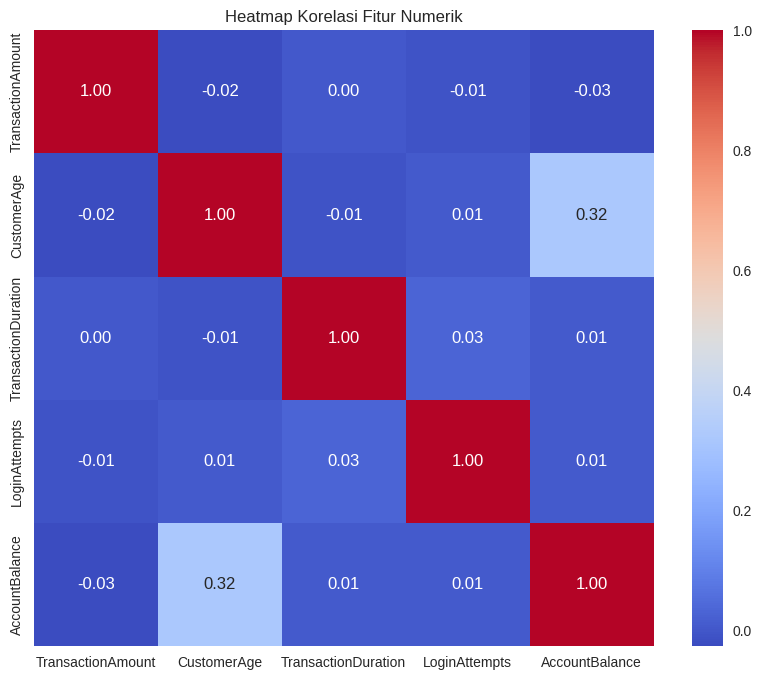

In [7]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_features = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

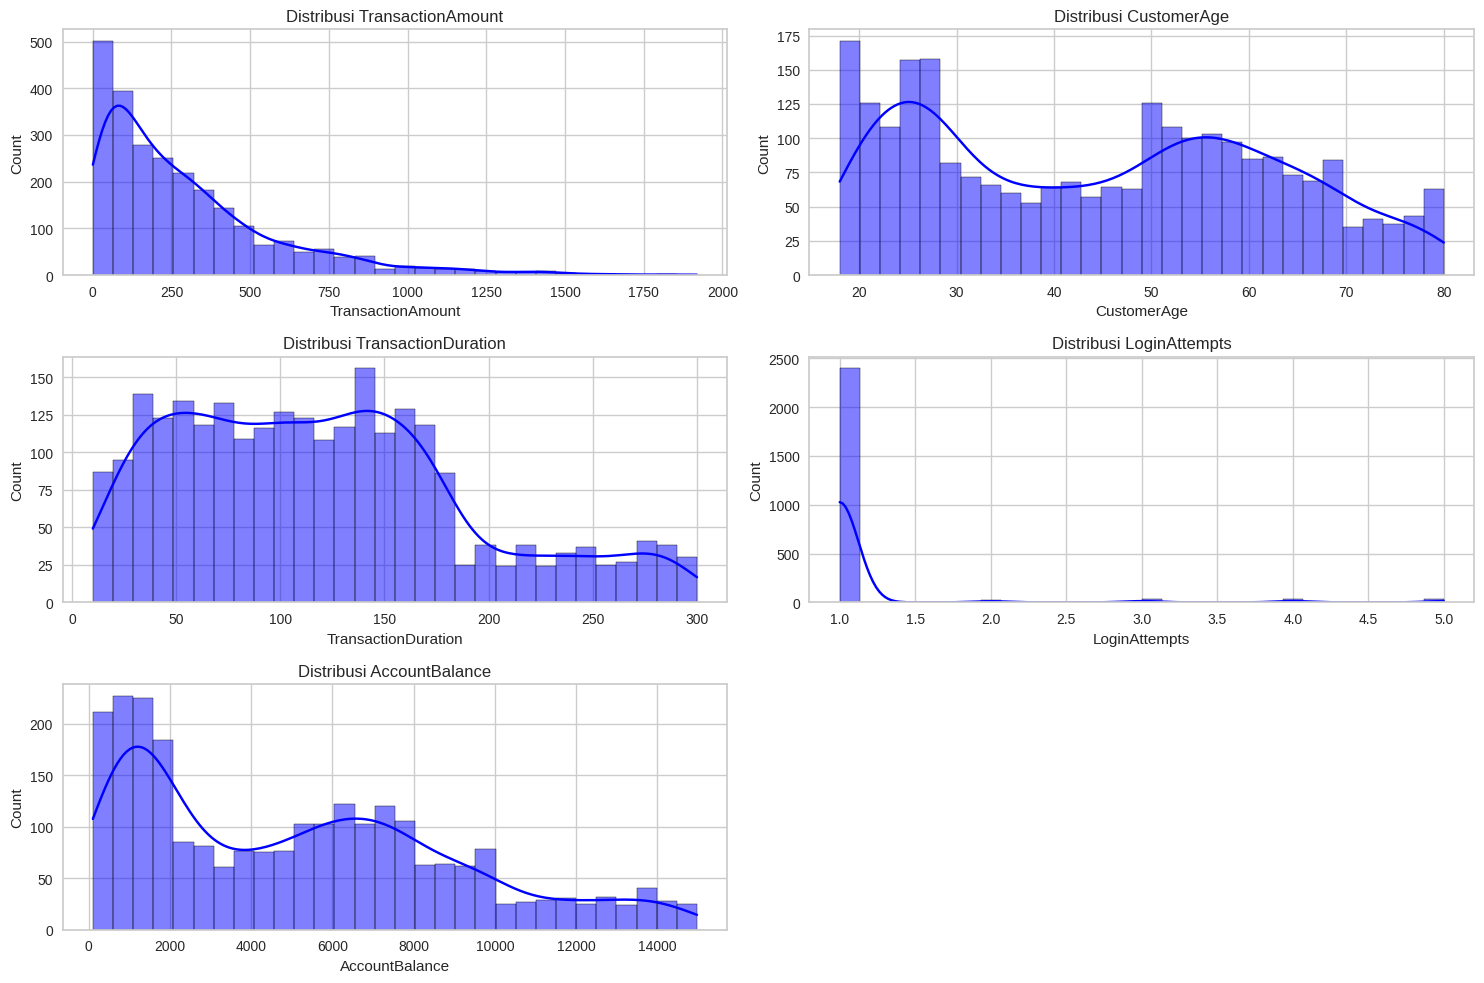

In [8]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_features, 1):
  plt.subplot(3, 2, i)
  sns.histplot(df[column], bins=30, kde= True, color='blue')
  plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

 ## Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]


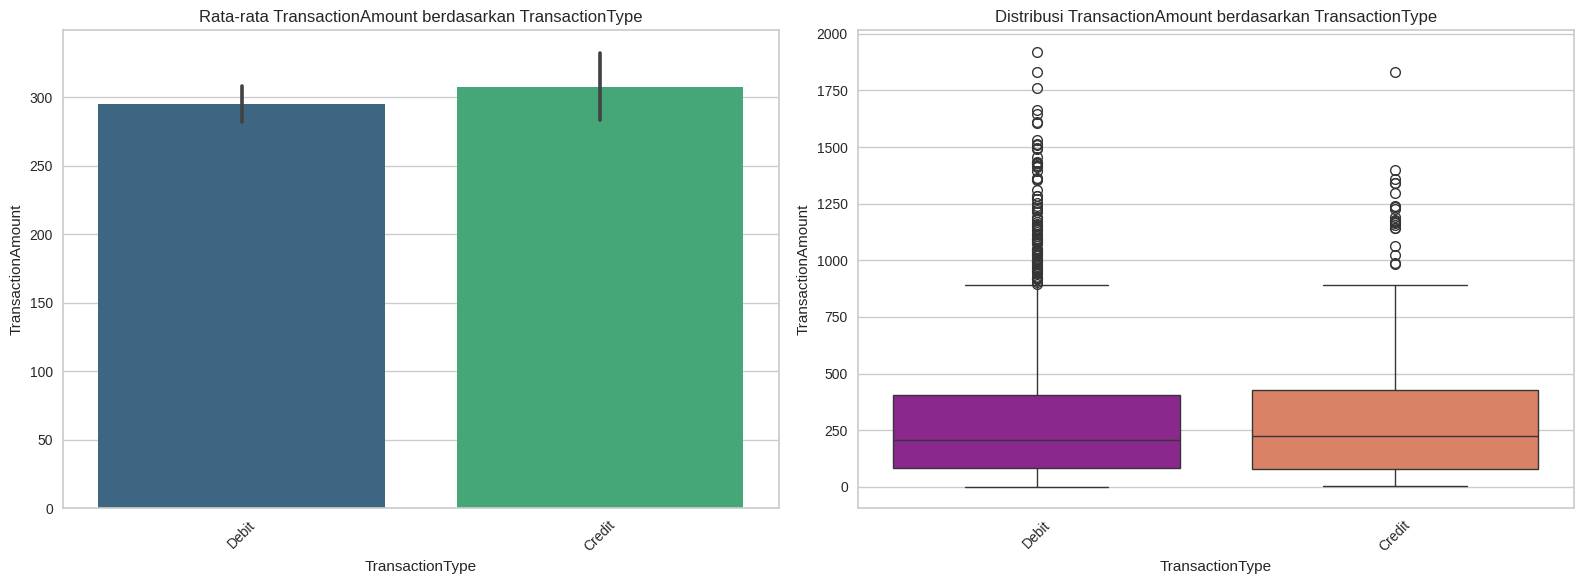

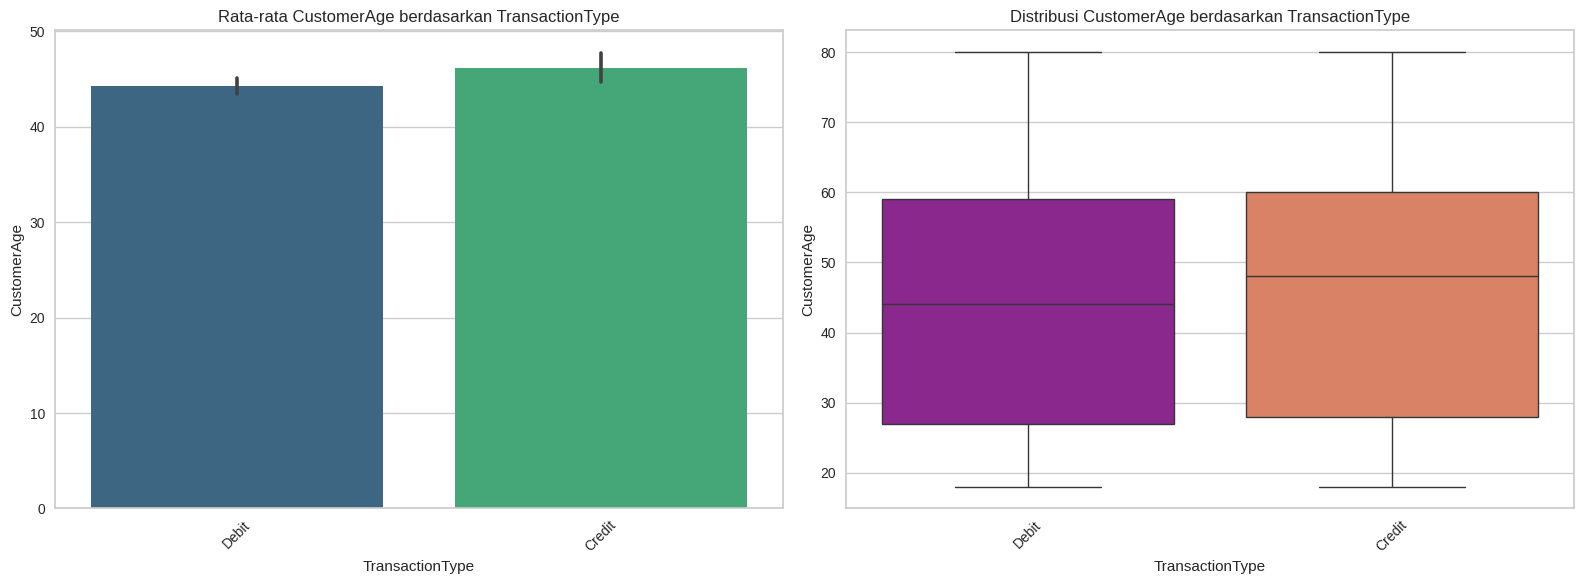

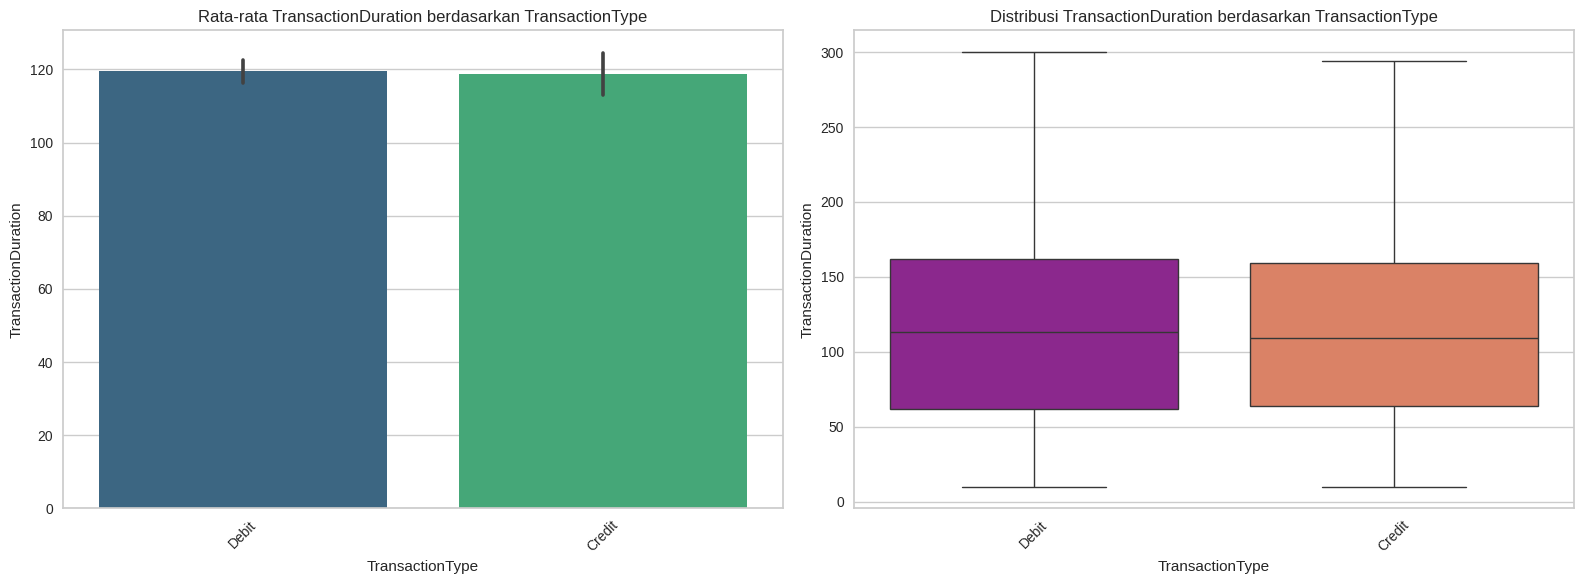

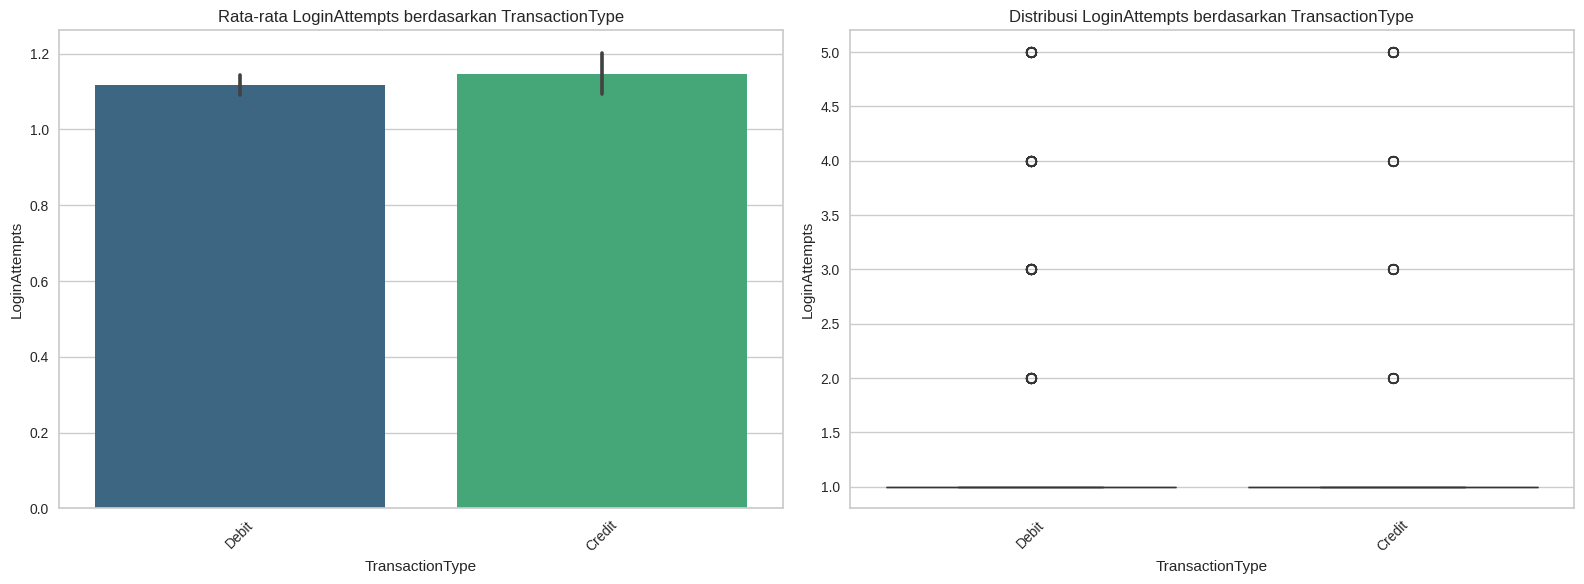

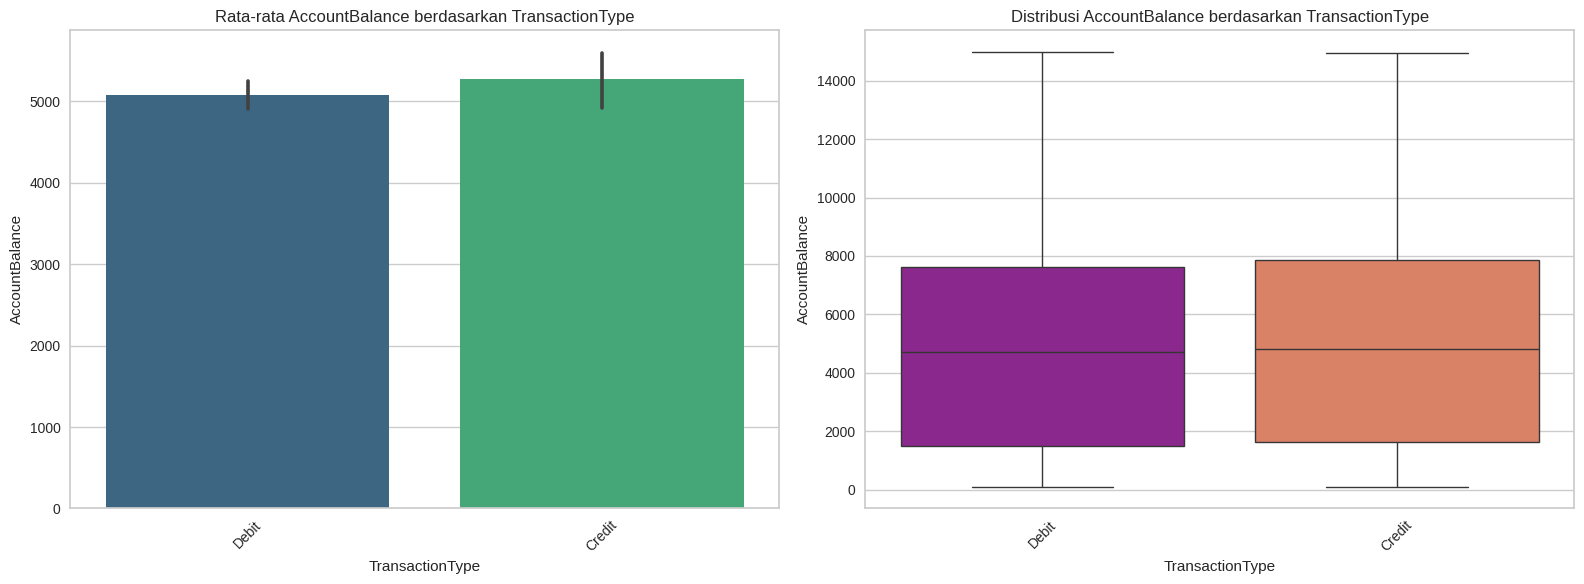

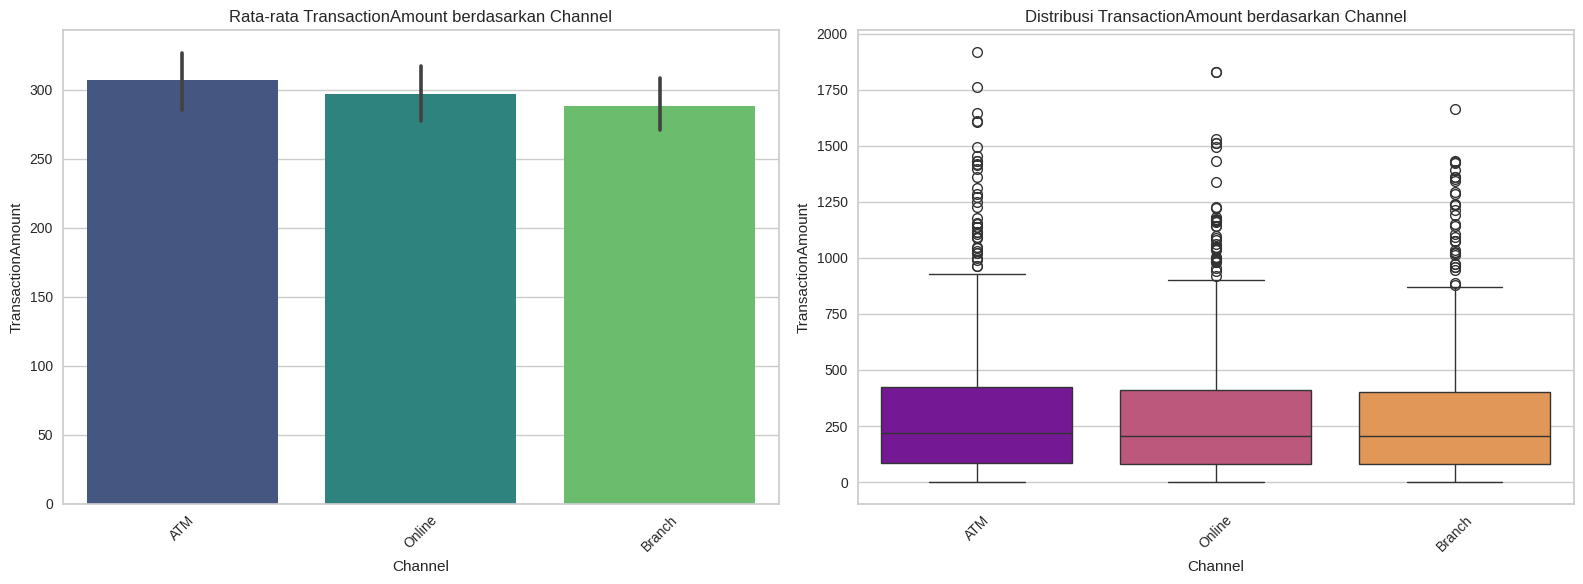

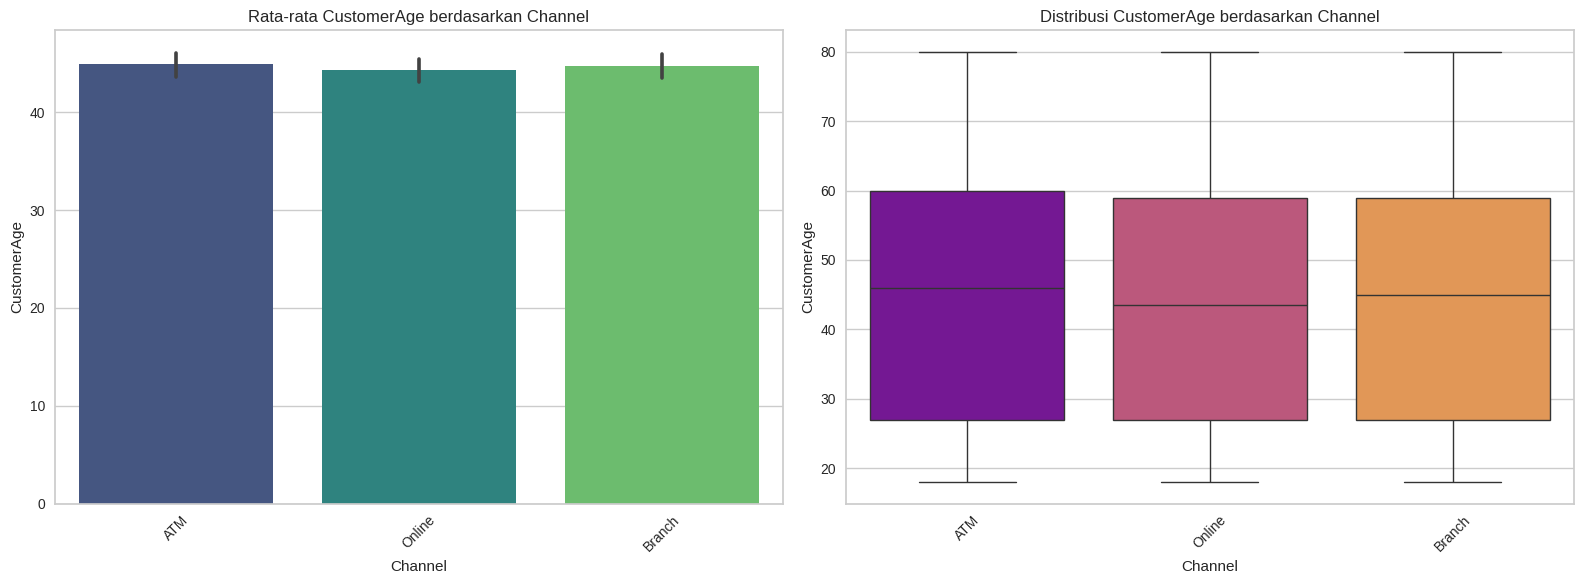

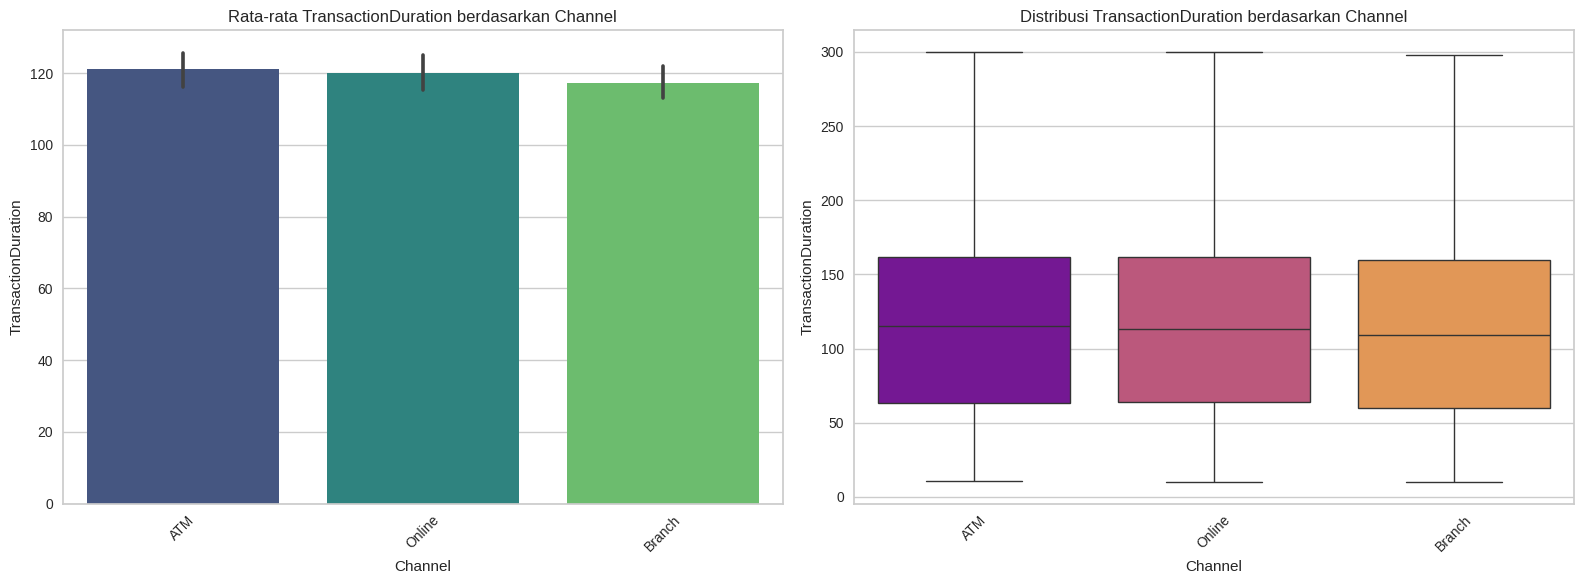

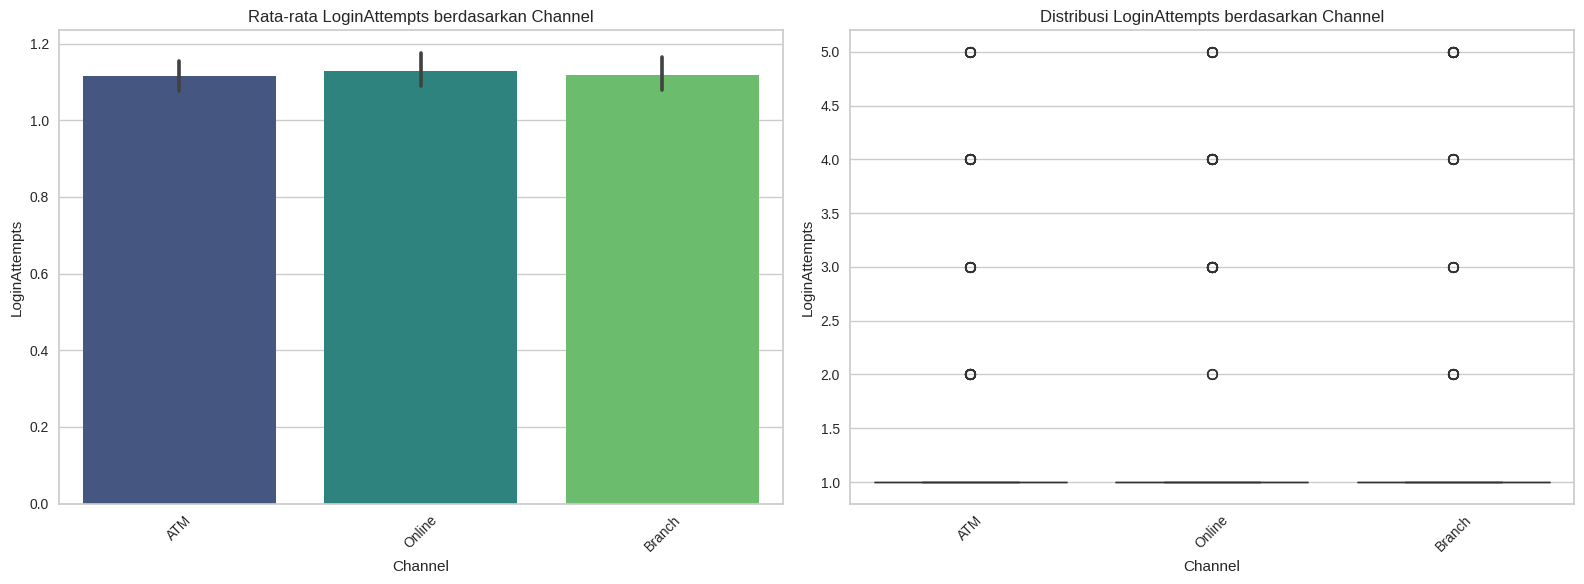

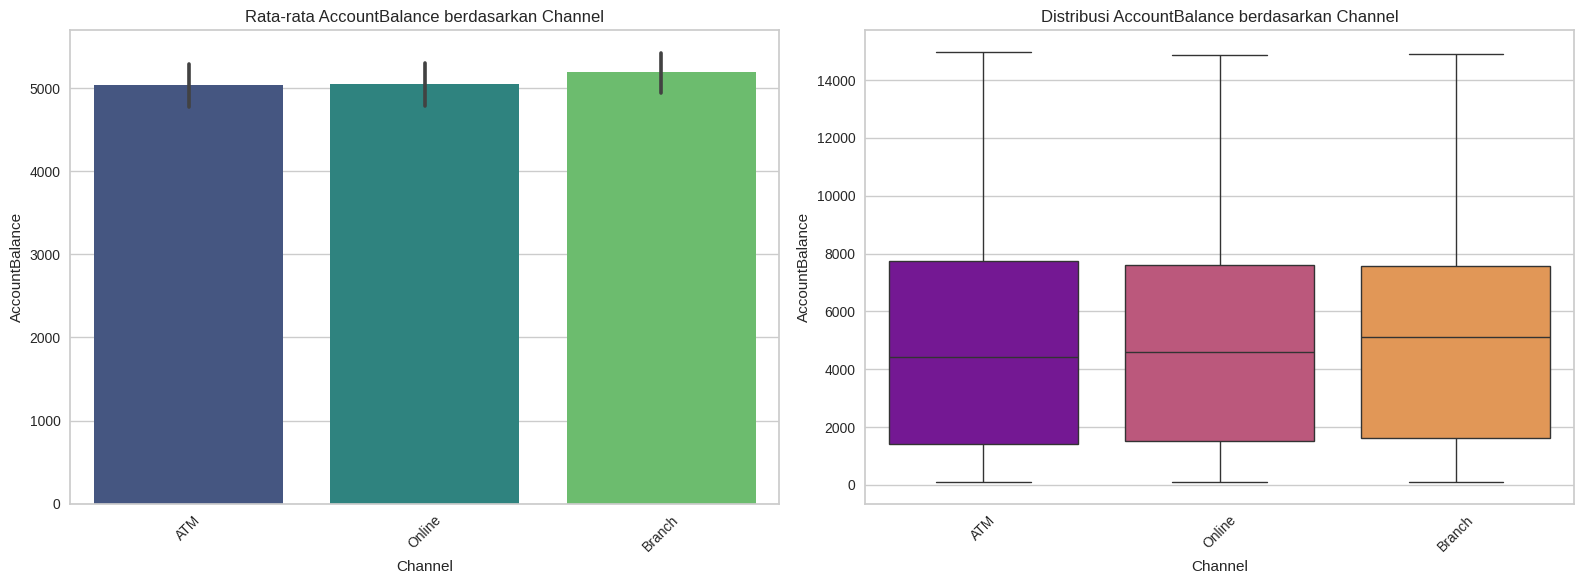

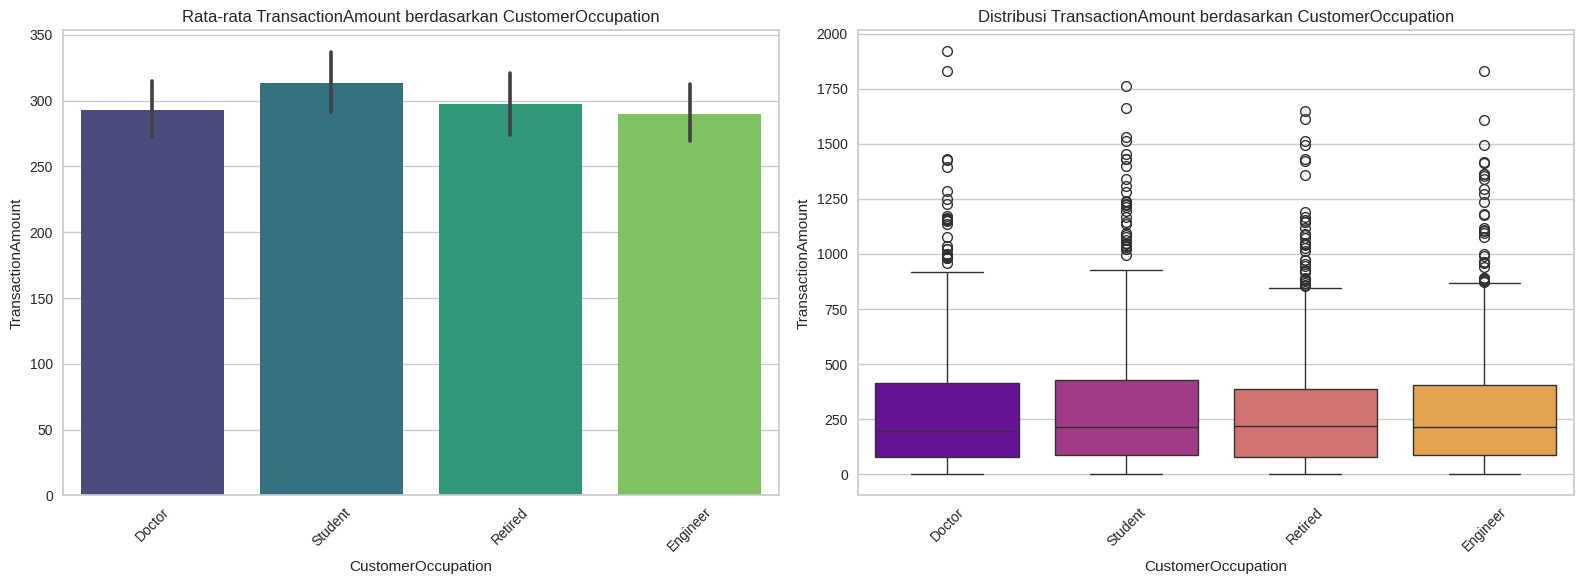

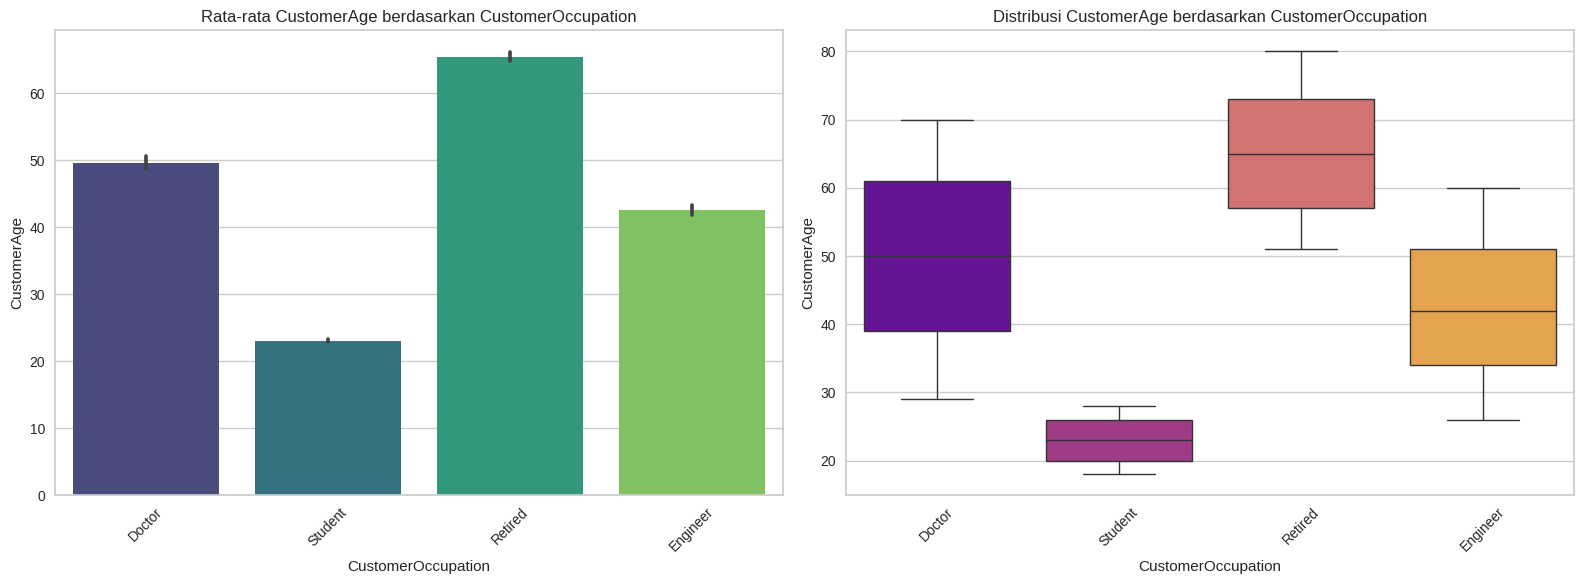

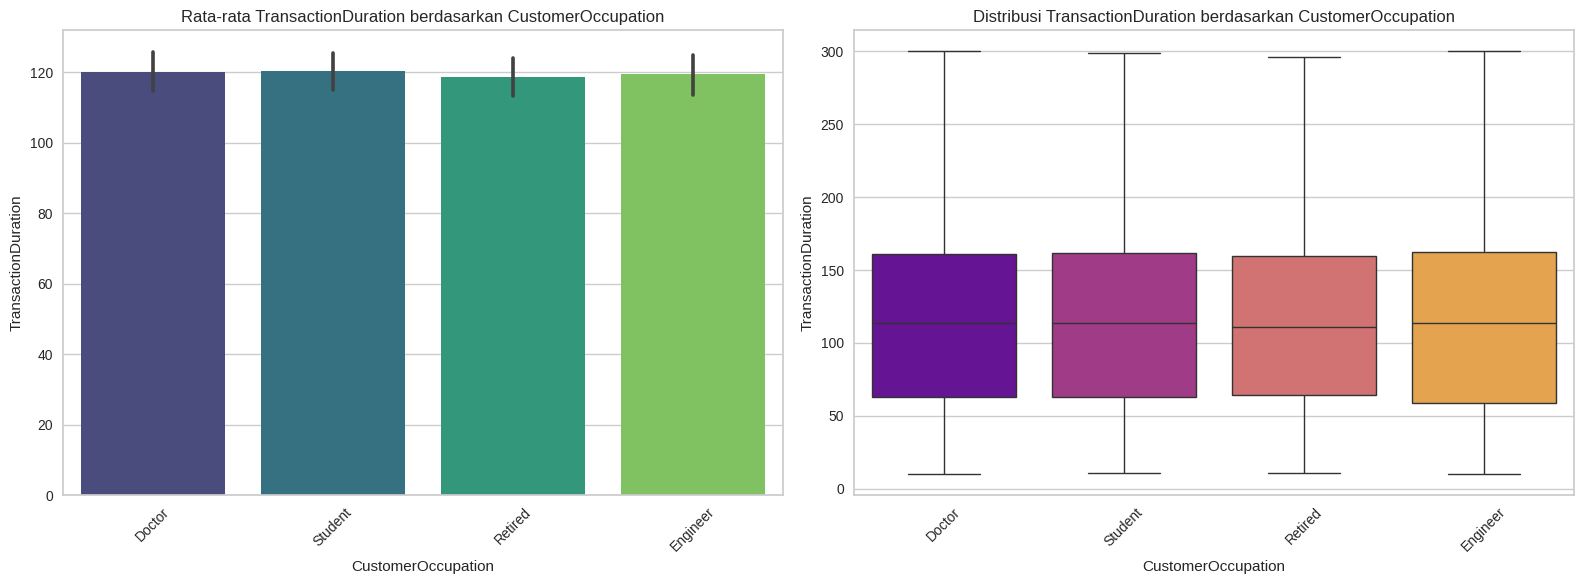

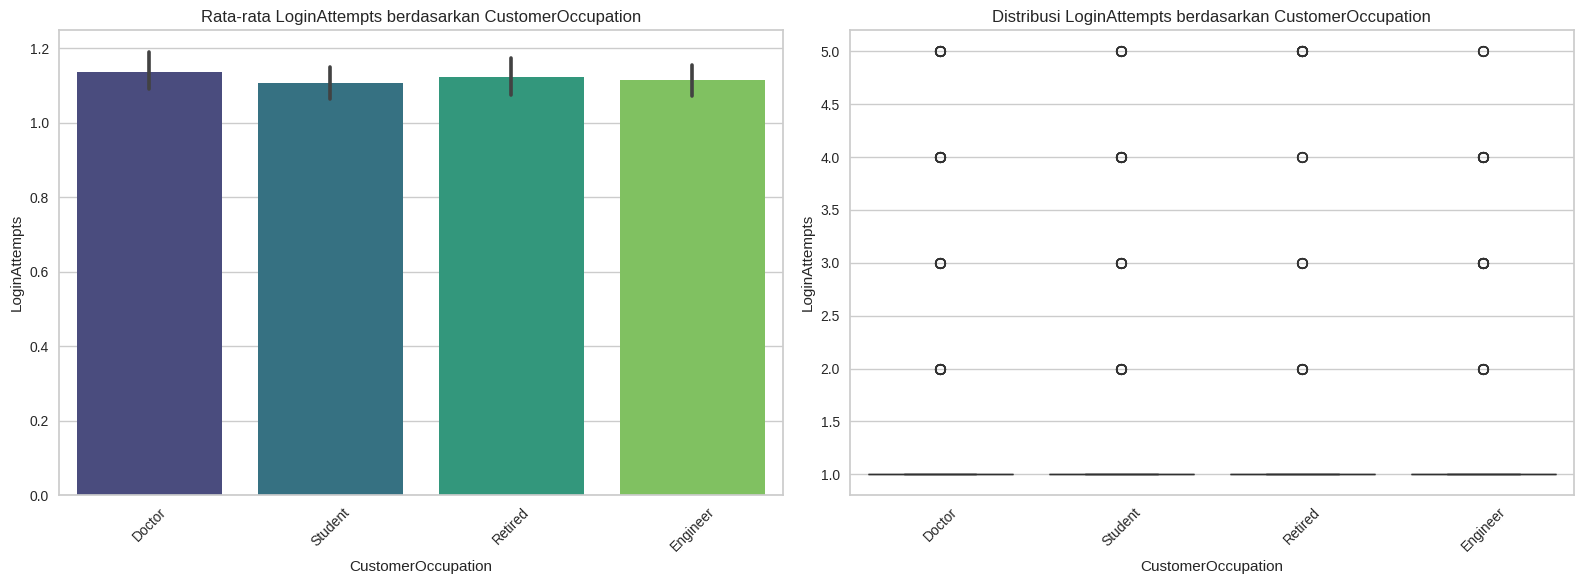

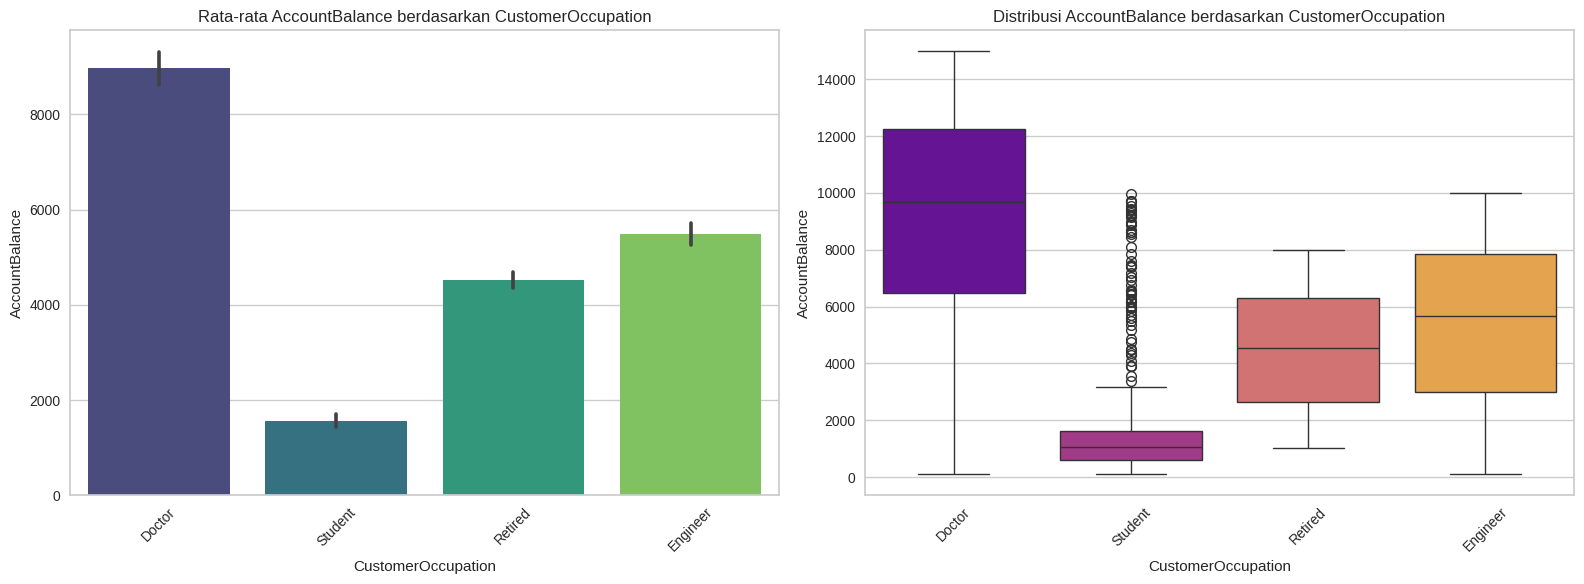

In [9]:
#  Menggunakan Box Plot untuk Membandingkan Distribusi Angka Antar Kategori
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    if df[feature].nunique() < 20 and df[feature].nunique() > 1:
        for num_feature in num_features:
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))
            # Plot 1: Bar Plot
            sns.barplot(x=feature, y=num_feature, data=df, ax=axes[0], estimator=np.mean, palette='viridis', hue=feature, legend=False)
            axes[0].set_title(f'Rata-rata {num_feature} berdasarkan {feature}')
            axes[0].tick_params(axis='x', rotation=45)
            # Plot 2: Box Plot
            sns.boxplot(x=feature, y=num_feature, data=df, ax=axes[1], palette='plasma', hue=feature, legend=False)
            axes[1].set_title(f'Distribusi {num_feature} berdasarkan {feature}')
            axes[1].tick_params(axis='x', rotation=45)
            plt.tight_layout()
            plt.show()


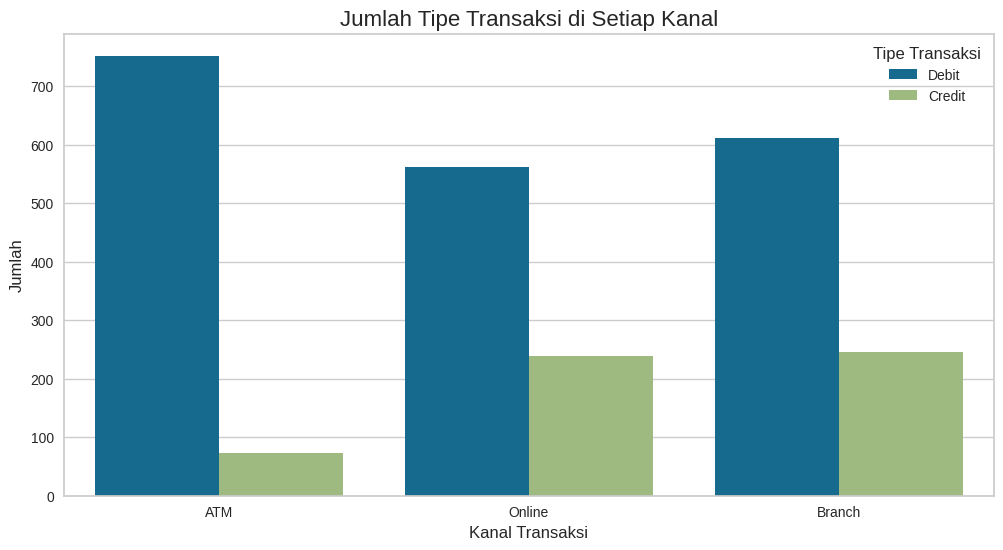

In [10]:
# Count Plot (dengan Hue): Melihat Hubungan Antar Kategori
plt.figure(figsize=(12, 6))
sns.countplot(x='Channel', hue='TransactionType', data=df)

plt.title('Jumlah Tipe Transaksi di Setiap Kanal', fontsize=16)
plt.xlabel('Kanal Transaksi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend(title='Tipe Transaksi')
plt.show()

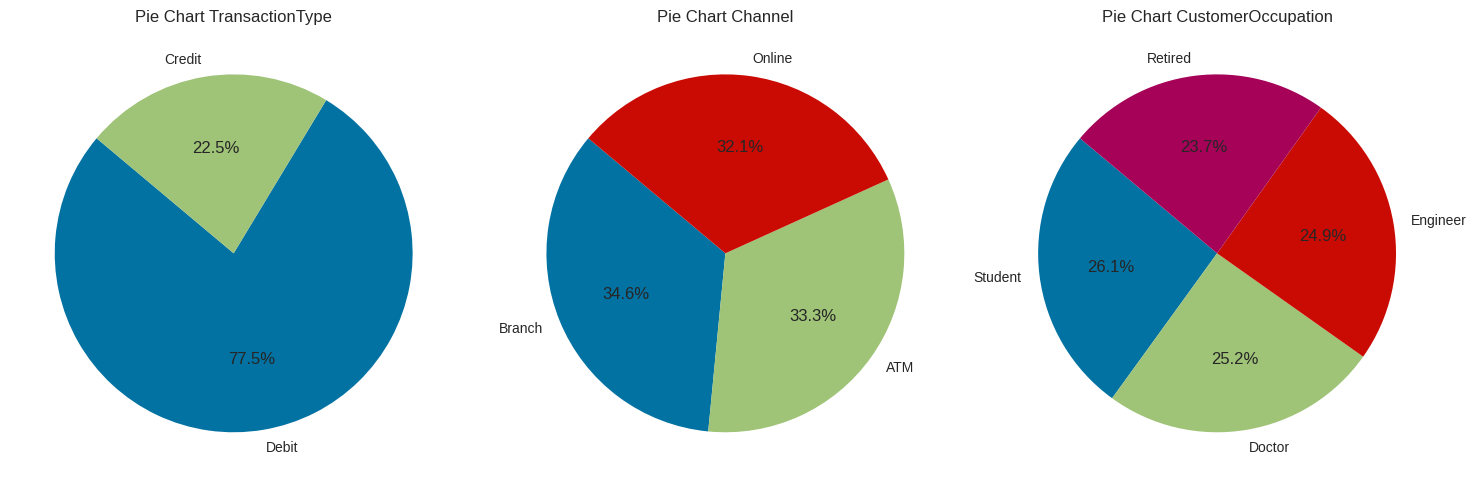

In [11]:
# Count Plot (dengan Hue): Melihat Hubungan Antar Kategori
categorical_features_filtered = [feature for feature in categorical_features if df[feature].nunique() < 20]
n_features = len(categorical_features_filtered)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, feature in enumerate(categorical_features_filtered):
    ax = axes[i]
    value_counts = df[feature].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Pie Chart {feature}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

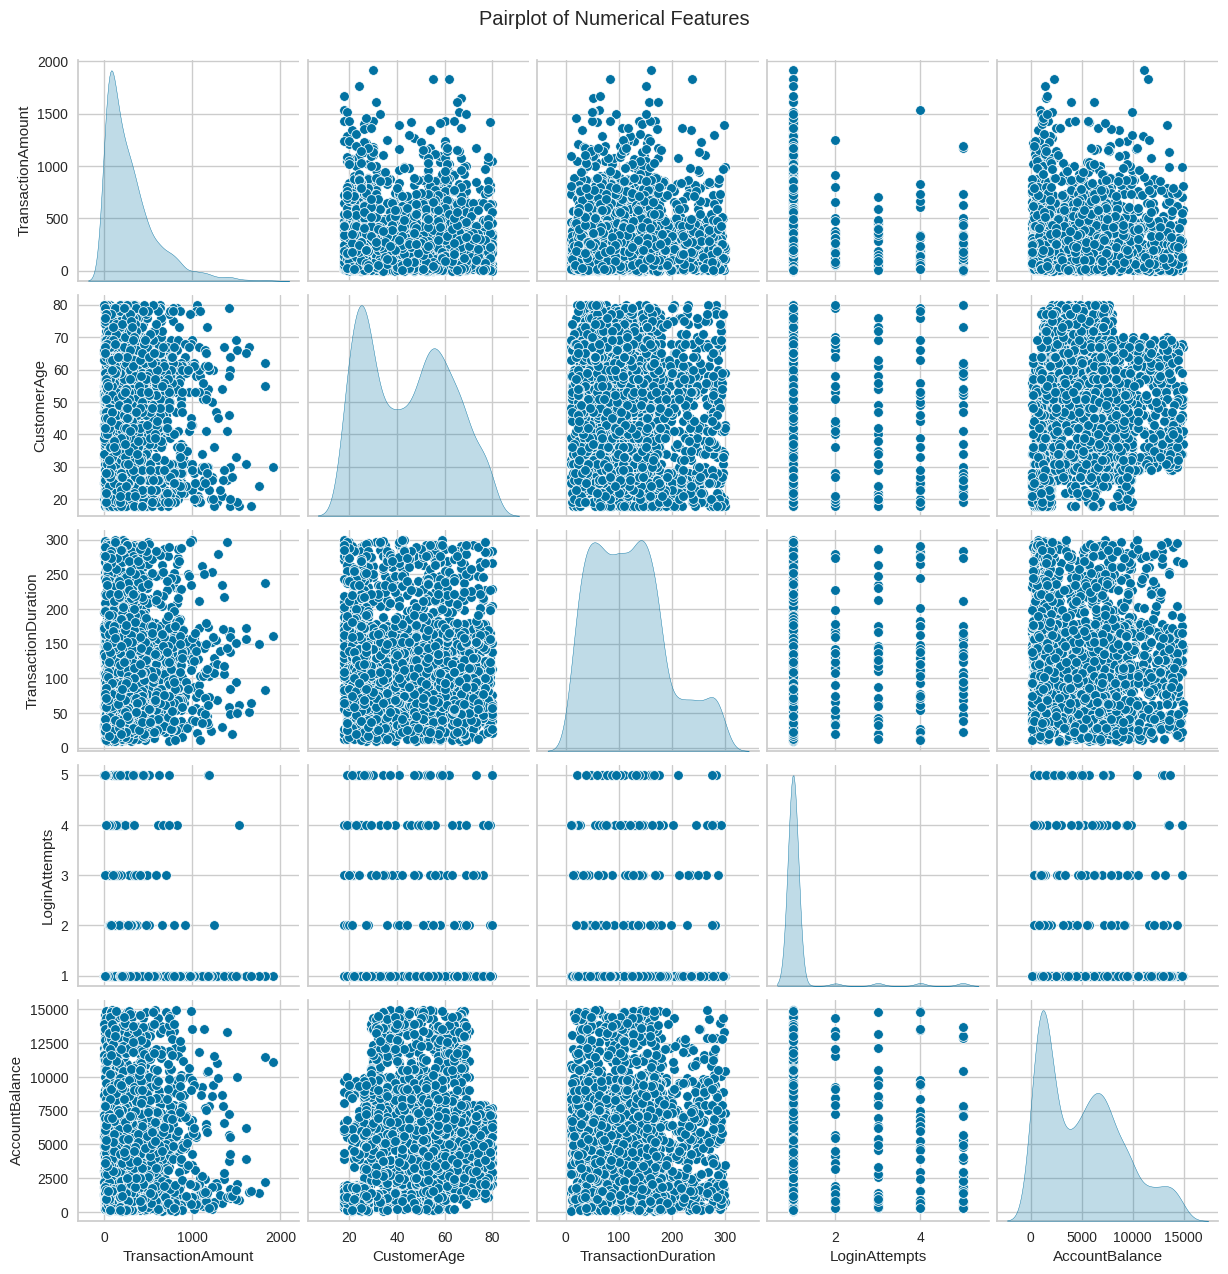

In [12]:
# Melihat hubungan antar setiap pasangan fitur numerik
sns.pairplot(df[num_features], diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

## Insight tahap EDA:

**1. Korelasi Antar Fitur Numerik (Heatmap)**
- Hubungan Antar Fitur Sangat Lemah: Hampir semua fitur numerik tidak memiliki korelasi linear yang kuat satu sama lain. Sebagian besar nilai korelasi mendekati 0.

- Satu-satunya Korelasi Positif (Lemah): Terdapat korelasi positif yang lemah sebesar +0.32 antara CustomerAge (Usia Nasabah) dan AccountBalance (Saldo Akun). Ini adalah temuan yang logis, di mana nasabah yang lebih tua cenderung memiliki akumulasi saldo yang lebih tinggi.

- Implikasi untuk Clustering: Karena fitur-fitur ini sebagian besar independen, masing-masing dapat memberikan informasi unik untuk membedakan kelompok-kelompok nasabah.

**2. Distribusi Fitur Numerik (Histogram)**
- Transaksi dan Saldo Tidak Merata: Distribusi TransactionAmount dan AccountBalance sangat condong ke kanan (right-skewed). Ini menunjukkan bahwa mayoritas nasabah memiliki saldo dan melakukan transaksi dengan nominal yang relatif kecil, sementara hanya segelintir nasabah yang memiliki saldo atau transaksi bernilai sangat besar. Transaksi-transaksi besar ini berpotensi menjadi outlier atau anomali.

- Usia Nasabah Bervariasi: Distribusi CustomerAge cukup merata dan cenderung bimodal, menunjukkan adanya dua kelompok usia dominan dalam data.

- Upaya Login Sebagai Indikator Anomali: LoginAttempts sangat terkonsentrasi pada nilai 1. Ini menandakan bahwa transaksi yang memerlukan lebih dari satu kali percobaan login adalah kejadian yang sangat jarang dan merupakan indikator kuat untuk aktivitas yang tidak biasa.

**3. Perbandingan Fitur Numerik dan Kategorikal (Box Plot & Bar Plot)**
- Pekerjaan Mempengaruhi Saldo:
 Dokter memiliki rata-rata AccountBalance tertinggi dengan sebaran data yang sangat luas, menandakan variabilitas kekayaan yang tinggi di kalangan dokter. Mahasiswa secara konsisten memiliki AccountBalance terendah, yang sesuai dengan ekspektasi demografis.

- Pensiunan adalah Kelompok Usia Tertua: Secara jelas, kelompok Retired memiliki rata-rata usia tertinggi, yang memvalidasi data.

- Pola Transaksi Serupa di Berbagai Kanal: Rata-rata TransactionAmount dan TransactionDuration hampir identik di semua kanal (ATM, Online, Branch). Ini menunjukkan bahwa kanal transaksi bukan faktor utama yang membedakan nominal atau durasi transaksi.

**4. Distribusi Fitur Kategorikal (Pie Chart)**
- Dominasi Transaksi Debit: Sekitar 77.5% dari total transaksi adalah jenis Debit, menunjukkan lebih banyak aktivitas pengeluaran dana daripada pemasukan.

- Kanal Transaksi Seimbang: Penggunaan kanal transaksi (Online, Branch, ATM) terdistribusi cukup merata. Ini berarti tidak ada satu kanal yang mendominasi secara signifikan.

- Profil Pekerjaan Beragam: Komposisi pekerjaan nasabah (Doctor, Student, Retired, Engineer) juga relatif seimbang, menunjukkan bahwa nasabah berasal dari berbagai latar belakang profesi.

**5. Hubungan Antar Pasangan Fitur (Pairplot)**
- Tidak Ada Cluster yang Jelas: Scatter plot antar fitur tidak menunjukkan adanya pengelompokan (cluster) yang terbentuk secara alami dan mudah dipisahkan. Ini mengindikasikan bahwa algoritma clustering seperti K-Means akan sangat bergantung pada penskalaan dan pemilihan fitur yang tepat untuk dapat menemukan pola yang tersembunyi.



# **4. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [13]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [14]:
# Mengecek dataset menggunakan duplicated().sum()
duplicated_values = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicated_values}")


Jumlah baris duplikat: 21


In [15]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Konversi ke datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Ekstraksi fitur waktu
df['DaysSincePrevTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days.abs()
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek # Senin=0, Minggu=6

# Drop fitur datetime asli (karena sudah diekstraksi)
df = df.drop(columns=['TransactionDate', 'PreviousTransactionDate'])
scaler = MinMaxScaler()
# Normalisasi khusus untuk CustomerAge dan simpan dalam fitur baru
if 'CustomerAge' in df.columns:
    df['CustomerAge_Normalized'] = scaler.fit_transform(df[['CustomerAge']])

# Normalisasi khusus untuk AccountBalance dan simpan dalam fitur baru
if 'AccountBalance' in df.columns:
    df['AccountBalance_Normalized'] = scaler.fit_transform(df[['AccountBalance']])

# Normalisasi semua fitur numerik selain CustomerAge, AccountBalance, dan LoginAttempts
exclude_features = ['CustomerAge', 'AccountBalance']
numerical_features = df.select_dtypes(include=['number']).columns.difference(exclude_features)
df[numerical_features] = scaler.fit_transform(df[numerical_features])
num_features = df.select_dtypes(include=[np.number]).columns
# Tampilkan dataframe setelah normalisasi
print(df.head())

  TransactionID AccountID  TransactionAmount TransactionType   Location  \
0      TX000001   AC00128           0.007207           Debit  San Diego   
1      TX000002   AC00455           0.195940           Debit    Houston   
2      TX000003   AC00019           0.065680           Debit       Mesa   
3      TX000004   AC00070           0.096016           Debit    Raleigh   
4      TX000005   AC00411           0.006874          Credit    Atlanta   

  DeviceID      IP Address MerchantID Channel  CustomerAge CustomerOccupation  \
0  D000380  162.198.218.92       M015     ATM         70.0             Doctor   
1  D000051     13.149.61.4       M052     ATM         68.0             Doctor   
2  D000235  215.97.143.157       M009  Online         19.0            Student   
3  D000187  200.13.225.150       M002  Online         26.0            Student   
4  D000308    65.164.3.100       M091  Online          NaN            Student   

   TransactionDuration  LoginAttempts  AccountBalance  \
0    

In [16]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address',# Identifier
                 'Location'], # Terlalu banyak kategori unik, kurang informatif untuk clustering'
         inplace=True)
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_Normalized,AccountBalance_Normalized
0,0.007207,Debit,ATM,70.0,Doctor,0.244828,0.0,5112.209961,0.728022,0.0,0.25,0.838710,0.336832
1,0.195940,Debit,ATM,68.0,Doctor,0.451724,0.0,13758.910156,0.516484,0.0,0.25,0.806452,0.918055
2,0.065680,Debit,Online,19.0,Student,0.158621,0.0,1122.349976,0.480769,1.0,0.00,0.016129,0.068637
3,0.096016,Debit,Online,26.0,Student,0.051724,0.0,8569.059570,0.662088,0.0,1.00,0.129032,0.569198
4,0.006874,Credit,Online,NaN,Student,0.648276,0.0,7429.399902,0.211538,0.5,0.00,NaN,0.492591


In [17]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

label_encoders = {}
# Update categorical_features to only include columns that exist in the DataFrame
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_Normalized,AccountBalance_Normalized
0,0.007207,1,0,70.0,0,0.244828,0.0,5112.209961,0.728022,0.0,0.25,0.838710,0.336832
1,0.195940,1,0,68.0,0,0.451724,0.0,13758.910156,0.516484,0.0,0.25,0.806452,0.918055
2,0.065680,1,2,19.0,3,0.158621,0.0,1122.349976,0.480769,1.0,0.00,0.016129,0.068637
3,0.096016,1,2,26.0,3,0.051724,0.0,8569.059570,0.662088,0.0,1.00,0.129032,0.569198
4,0.006874,0,2,NaN,3,0.648276,0.0,7429.399902,0.211538,0.5,0.00,NaN,0.492591


In [18]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'DaysSincePrevTransaction',
 'TransactionHour',
 'TransactionDayOfWeek',
 'CustomerAge_Normalized',
 'AccountBalance_Normalized']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [19]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Untuk fitur numerik, kita isi dengan median karena lebih robust terhadap outlier,

for feature in num_features:
     df[feature] = df[feature].fillna(df[feature].median())

# Untuk fitur kategorikal, kita isi dengan modus (nilai yang paling sering muncul)
for feature in categorical_features:
     df[feature] = df[feature].fillna(df[feature].mode()[0])
# Menampilkan jumlah missing value setelah handling
df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0
DaysSincePrevTransaction,0
TransactionHour,0


In [20]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

VISUALISASI SEBELUM HANDLING OUTLIER


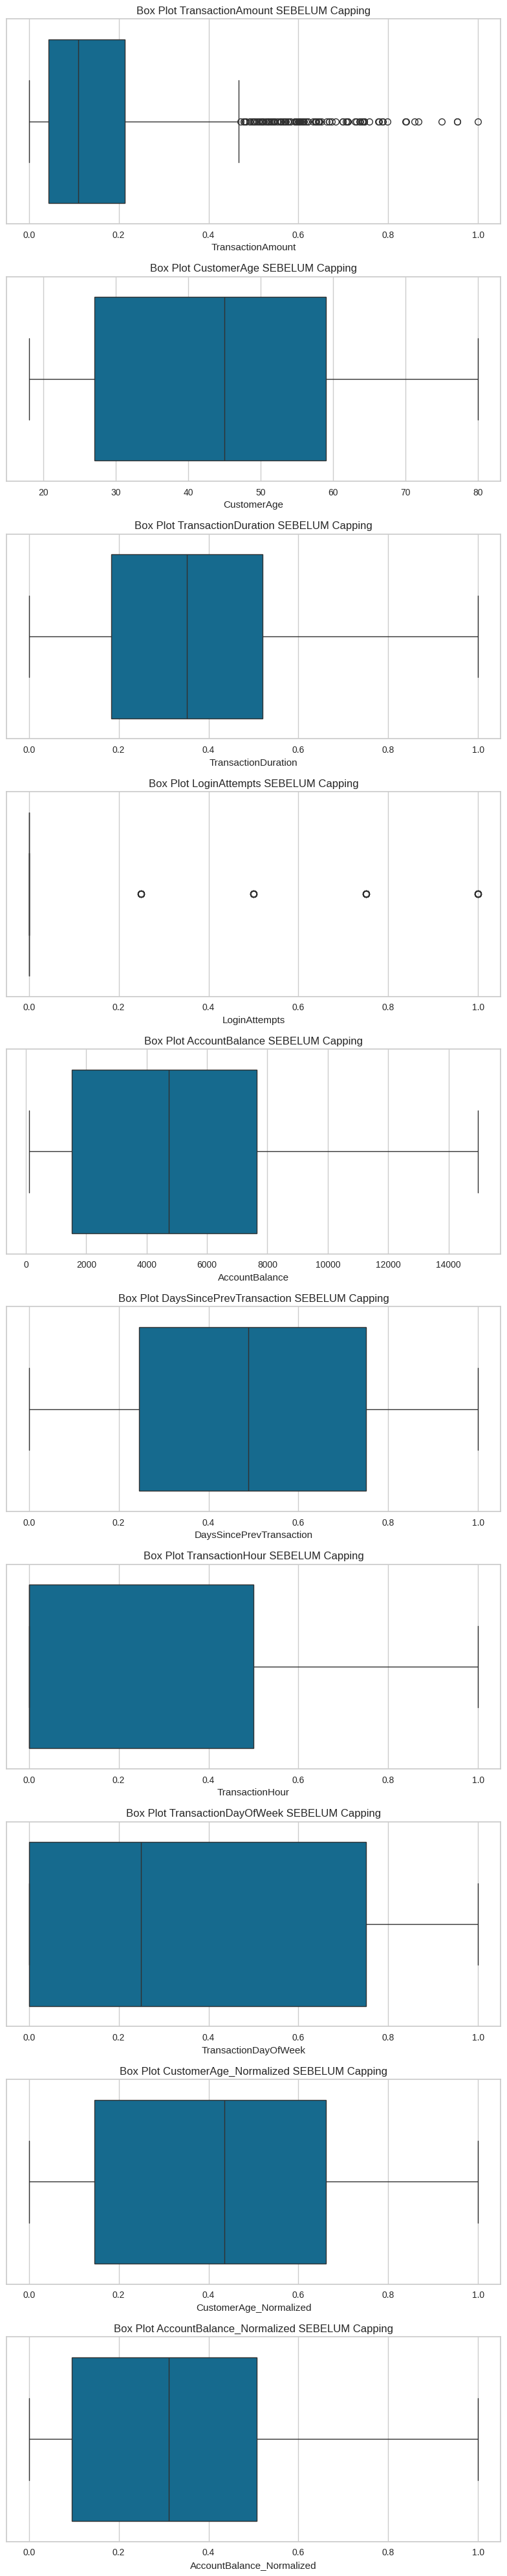


VISUALISASI SESUDAH HANDLING OUTLIER


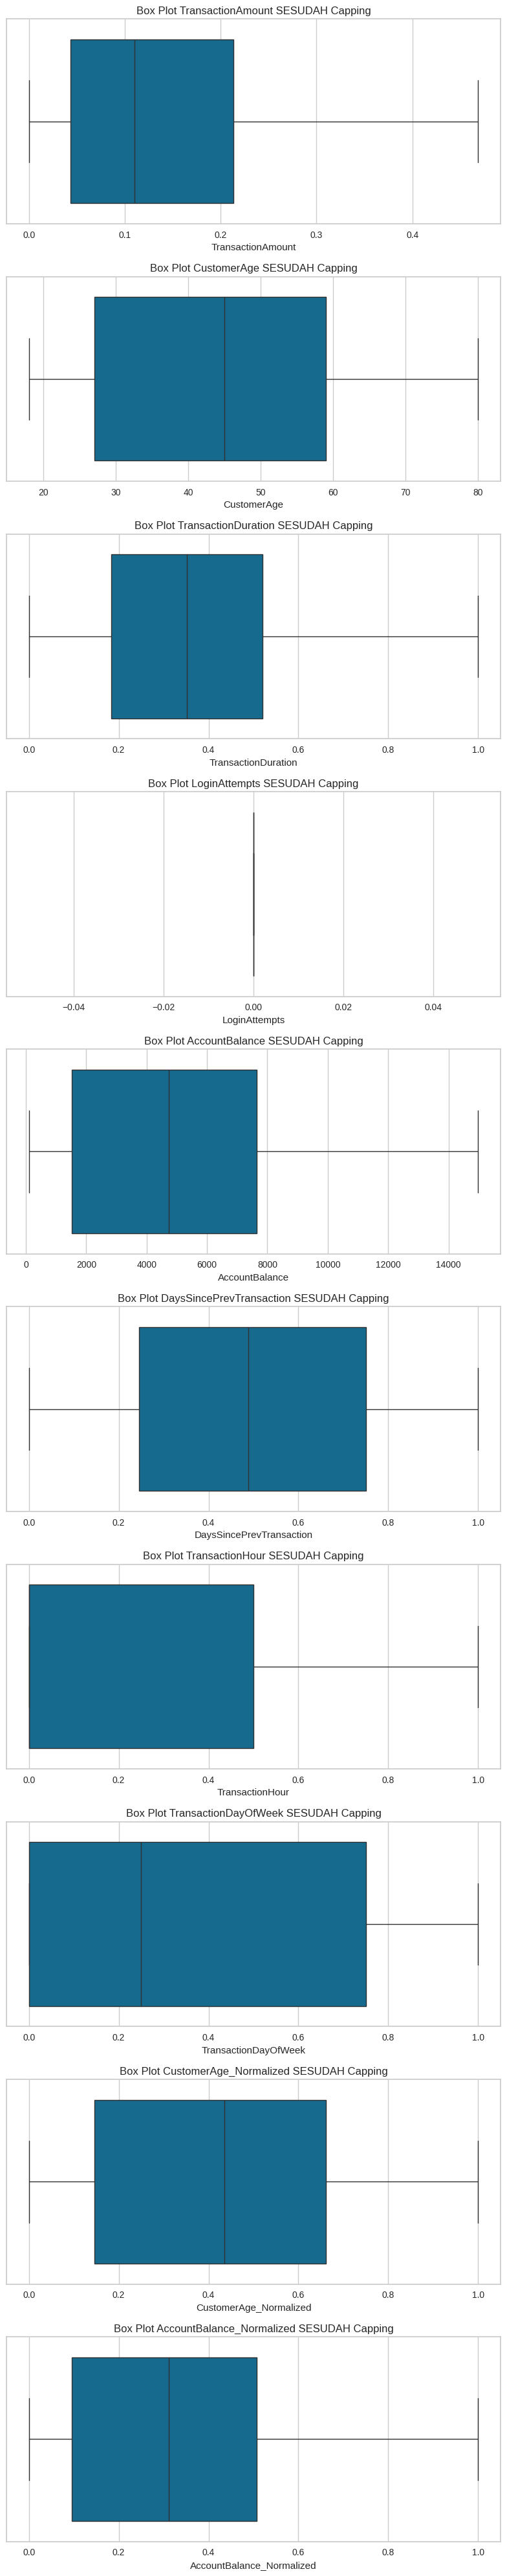

In [21]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
print("VISUALISASI SEBELUM HANDLING OUTLIER")
fig_before, axes_before = plt.subplots(len(num_features), 1, figsize=(8, 4 * len(num_features)))
# Jika hanya ada 1 fitur, ubah axes menjadi list agar bisa di-loop
if len(num_features) == 1:
    axes_before = [axes_before]

for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes_before[i])
    axes_before[i].set_title(f'Box Plot {feature} SEBELUM Capping')
plt.tight_layout()
plt.show()


# Proses Capping
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)


# Visualisasi SESUDAH Capping
print("\nVISUALISASI SESUDAH HANDLING OUTLIER")
fig_after, axes_after = plt.subplots(len(num_features), 1, figsize=(8, 4 * len(num_features)))
# Jika hanya ada 1 fitur, ubah axes menjadi list agar bisa di-loop
if len(num_features) == 1:
    axes_after = [axes_after]

for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes_after[i])
    axes_after[i].set_title(f'Box Plot {feature} SESUDAH Capping')
plt.tight_layout()
plt.show()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513 entries, 0 to 2535
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TransactionAmount          2513 non-null   float64
 1   TransactionType            2513 non-null   int64  
 2   Channel                    2513 non-null   int64  
 3   CustomerAge                2513 non-null   float32
 4   CustomerOccupation         2513 non-null   int64  
 5   TransactionDuration        2513 non-null   float64
 6   LoginAttempts              2513 non-null   float64
 7   AccountBalance             2513 non-null   float32
 8   DaysSincePrevTransaction   2513 non-null   float64
 9   TransactionHour            2513 non-null   float64
 10  TransactionDayOfWeek       2513 non-null   float64
 11  CustomerAge_Normalized     2513 non-null   float64
 12  AccountBalance_Normalized  2513 non-null   float64
dtypes: float32(2), float64(8), int64(3)
memory usage: 255

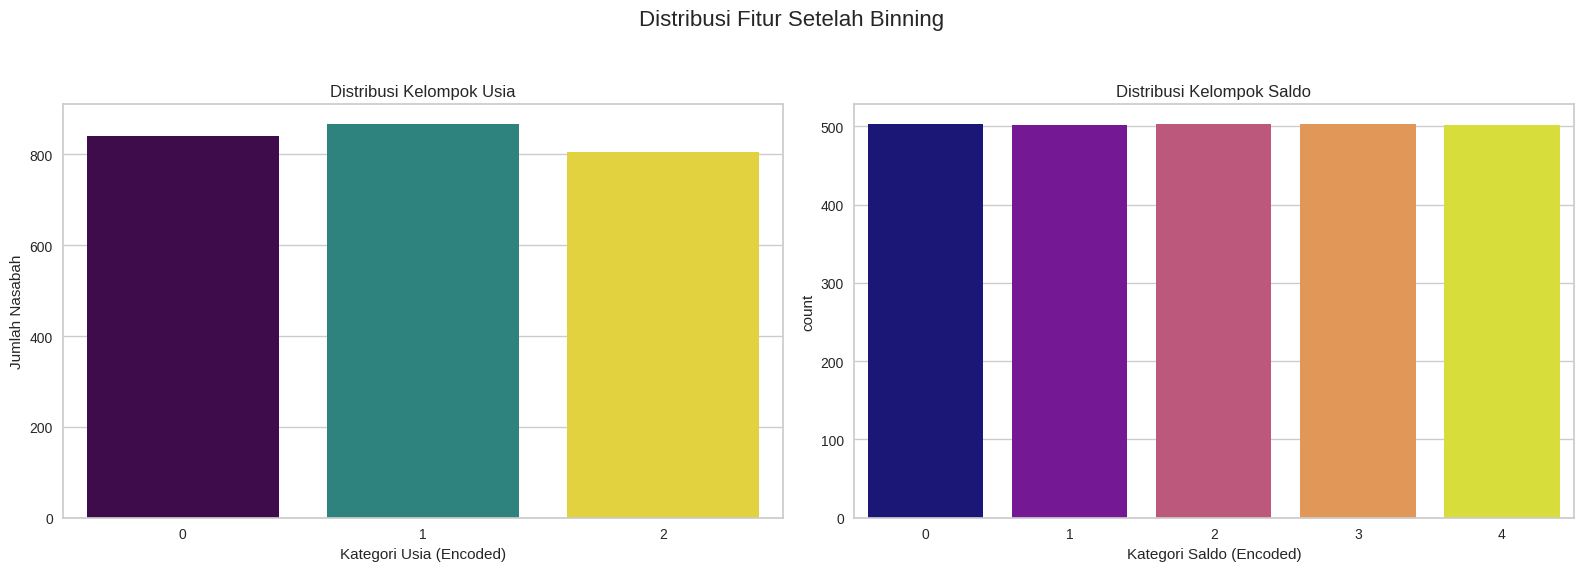

In [23]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# Binning untuk CustomerAge
age_labels = ['Muda', 'Dewasa', 'Tua']
df['CustomerAge_bin'] = pd.qcut(df['CustomerAge_Normalized'], q=3,labels=age_labels, duplicates='drop')

balance_labels = ['Sangat Rendah', 'Rendah', 'Menengah', 'Tinggi', 'Sangat Tinggi']
df['AccountBalance_bin'] = pd.qcut(df['AccountBalance_Normalized'], q=5, labels=balance_labels, duplicates='drop')

df[['CustomerAge', 'CustomerAge_bin', 'AccountBalance', 'AccountBalance_bin']].head()

le = LabelEncoder()
df['CustomerAge_encoded'] = le.fit_transform(df['CustomerAge_bin'])
df['AccountBalance_encoded'] = le.fit_transform(df['AccountBalance_bin'])

df[['CustomerAge_bin', 'CustomerAge_encoded', 'AccountBalance_bin', 'AccountBalance_encoded']].head()
# Drop kolom _Normalized yang asli karena sudah digantikan oleh versi encoded (binned)
df.drop(columns=['CustomerAge_Normalized', 'AccountBalance_Normalized', 'CustomerAge_bin', 'AccountBalance_bin'], inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribusi Fitur Setelah Binning', fontsize=16)

sns.countplot(ax=axes[0], x='CustomerAge_encoded', data=df, palette='viridis', hue='CustomerAge_encoded', legend=False)
axes[0].set_title("Distribusi Kelompok Usia")
axes[0].set_xlabel("Kategori Usia (Encoded)")
axes[0].set_ylabel("Jumlah Nasabah")

sns.countplot(ax=axes[1], x='AccountBalance_encoded', data=df, palette='plasma', hue='AccountBalance_encoded', legend=False)
axes[1].set_title("Distribusi Kelompok Saldo")
axes[1].set_xlabel("Kategori Saldo (Encoded)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [24]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_encoded,AccountBalance_encoded
0,0.007207,1,0,70.0,0,0.244828,0.0,5112.209961,0.728022,0.0,0.25,2,0
1,0.195940,1,0,68.0,0,0.451724,0.0,13758.910156,0.516484,0.0,0.25,2,3
2,0.065680,1,2,19.0,3,0.158621,0.0,1122.349976,0.480769,1.0,0.00,1,2
3,0.096016,1,2,26.0,3,0.051724,0.0,8569.059570,0.662088,0.0,1.00,1,3
4,0.006874,0,2,45.0,3,0.648276,0.0,7429.399902,0.211538,0.5,0.00,0,4


# **5. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [25]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_encoded,AccountBalance_encoded
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.0,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,0.147667,0.787903,1.011142,44.626740,1.530442,0.377584,0.0,5112.058105,0.495040,0.309988,0.361620,0.986470,1.999602
std,0.130096,0.437108,0.830760,17.744596,1.150658,0.240157,0.0,3878.755127,0.289671,0.365468,0.376161,0.809365,1.414354
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.0,101.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043203,1.000000,0.000000,27.000000,0.000000,0.182759,0.0,1519.349976,0.244505,0.000000,0.000000,0.000000,1.000000
50%,0.110014,1.000000,1.000000,45.000000,2.000000,0.351724,0.0,4734.110352,0.489011,0.000000,0.250000,1.000000,2.000000
75%,0.213331,1.000000,2.000000,59.000000,3.000000,0.520690,0.0,7642.250000,0.750000,0.500000,0.750000,2.000000,3.000000
max,0.468523,2.000000,3.000000,80.000000,4.000000,1.000000,0.0,14977.990234,1.000000,1.000000,1.000000,2.000000,4.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513 entries, 0 to 2535
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionAmount         2513 non-null   float64
 1   TransactionType           2513 non-null   int64  
 2   Channel                   2513 non-null   int64  
 3   CustomerAge               2513 non-null   float32
 4   CustomerOccupation        2513 non-null   int64  
 5   TransactionDuration       2513 non-null   float64
 6   LoginAttempts             2513 non-null   float64
 7   AccountBalance            2513 non-null   float32
 8   DaysSincePrevTransaction  2513 non-null   float64
 9   TransactionHour           2513 non-null   float64
 10  TransactionDayOfWeek      2513 non-null   float64
 11  CustomerAge_encoded       2513 non-null   int64  
 12  AccountBalance_encoded    2513 non-null   int64  
dtypes: float32(2), float64(6), int64(5)
memory usage: 255.2 KB


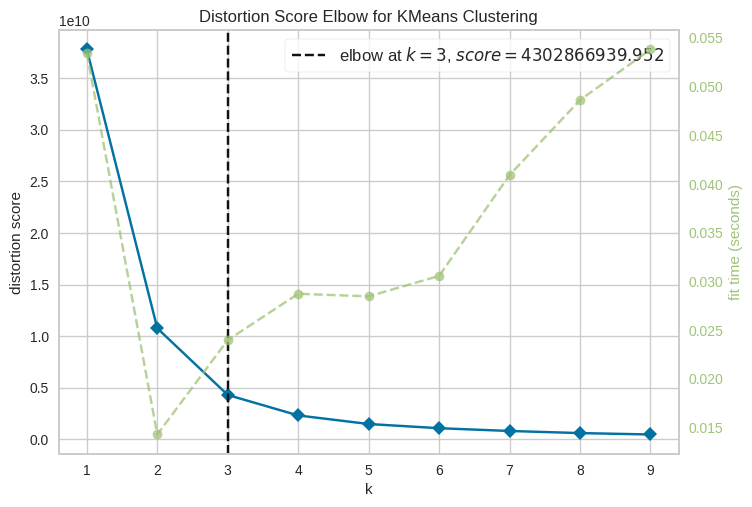

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
features_for_clustering = ['CustomerAge', 'AccountBalance', 'CustomerOccupation', 'LoginAttempts', 'DaysSincePrevTransaction','TransactionHour', 'TransactionDayOfWeek',
                           'TransactionType', 'TransactionDuration', 'Channel', 'TransactionAmount']
X = df[features_for_clustering]

kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [28]:
# Menggunakan algoritma K-Means Clustering
# Berdasarkan hasil Elbow Method, pilih jumlah cluster optimal
n_clusters = 3

# Select features for clustering and drop rows with NaN values
features_for_clustering = ['CustomerAge', 'AccountBalance', 'CustomerOccupation', 'LoginAttempts', 'DaysSincePrevTransaction','TransactionHour', 'TransactionDayOfWeek',
                           'TransactionType', 'TransactionDuration', 'Channel', 'TransactionAmount']
df_clustered = df[features_for_clustering]
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df_clustered)
labels = kmeans.labels_
cluster_series = pd.Series(labels, index=df_clustered.index)
df['Cluster'] = cluster_series

df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_encoded,AccountBalance_encoded,Cluster
0,0.007207,1,0,70.0,0,0.244828,0.0,5112.209961,0.728022,0.0,0.25,2,0,0
1,0.195940,1,0,68.0,0,0.451724,0.0,13758.910156,0.516484,0.0,0.25,2,3,2
2,0.065680,1,2,19.0,3,0.158621,0.0,1122.349976,0.480769,1.0,0.00,1,2,1
3,0.096016,1,2,26.0,3,0.051724,0.0,8569.059570,0.662088,0.0,1.00,1,3,0
4,0.006874,0,2,45.0,3,0.648276,0.0,7429.399902,0.211538,0.5,0.00,0,4,0


Jalankan cell code ini untuk menyimpan model kamu.

In [29]:
df_clustered

,CustomerAge,AccountBalance,CustomerOccupation,LoginAttempts,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,TransactionType,TransactionDuration,Channel,TransactionAmount
0,70.0,5112.209961,0,0.0,0.728022,0.0,0.25,1,0.244828,0,0.007207
1,68.0,13758.910156,0,0.0,0.516484,0.0,0.25,1,0.451724,0,0.195940
2,19.0,1122.349976,3,0.0,0.480769,1.0,0.00,1,0.158621,2,0.065680
3,26.0,8569.059570,3,0.0,0.662088,0.0,1.00,1,0.051724,2,0.096016
4,45.0,7429.399902,3,0.0,0.211538,0.5,0.00,0,0.648276,2,0.006874
...,...,...,...,...,...,...,...,...,...,...,...
2508,48.0,254.750000,0,0.0,0.782967,0.5,0.50,1,0.575862,1,0.130953
2509,56.0,3382.909912,2,0.0,0.365385,0.5,0.00,1,0.468966,1,0.014785
2510,23.0,1776.910034,3,0.0,0.854396,0.0,1.00,1,0.031034,2,0.096782
2511,24.0,131.250000,3,0.0,0.881868,0.0,0.25,0,0.286207,2,0.126545


In [30]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.64


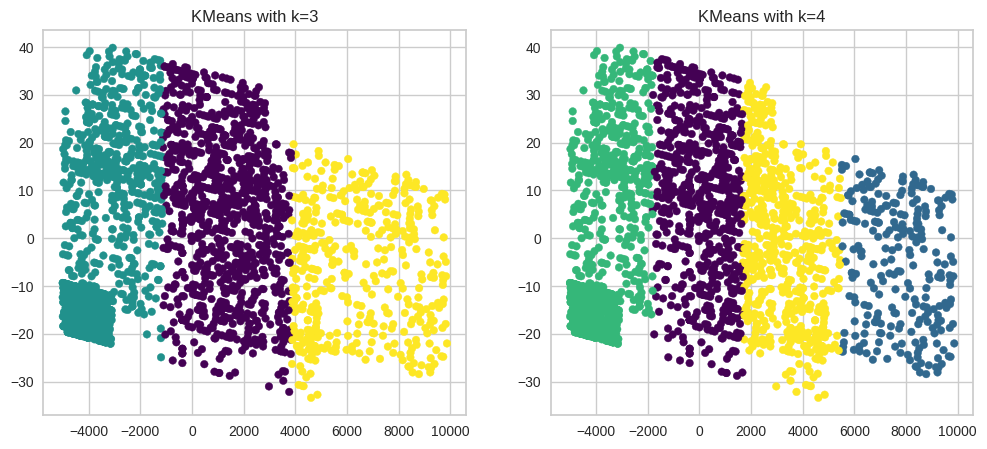

In [32]:
# Membuat visualisasi hasil clustering
# reduksi dimensi data ke 2d
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)

labels3 = kmeans2.fit_predict(X)
labels4 = kmeans4.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K=3
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels3, cmap="viridis", s=30)
axes[0].set_title("KMeans with k=3")

# K=4
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels4, cmap="viridis", s=30)
axes[1].set_title("KMeans with k=4")

plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

# Pilih fitur yang akan digunakan untuk clustering
features_for_clustering = ['CustomerAge', 'AccountBalance', 'CustomerOccupation', 'LoginAttempts', 'DaysSincePrevTransaction','TransactionHour', 'TransactionDayOfWeek',
                           'TransactionType', 'TransactionDuration', 'Channel', 'TransactionAmount']
X = df[features_for_clustering]

# Lakukan PCA untuk memilih fitur yang paling penting
pca = PCA(n_components=0.95)  # Menentukan jumlah komponen yang menjelaskan 95% varians data
X_pca = pca.fit_transform(X)

# Hitung Silhouette Score setelah PCA
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(X_pca)
labels_pca = kmeans.labels_
silhouette_avg_pca = silhouette_score(X_pca, labels_pca)

print(f"Silhouette Score setelah PCA: {silhouette_avg_pca:.2f}")
# Iterasi untuk mencari jumlah komponen PCA yang menghasilkan silhouette score > 0.7
for n_components in range(1, len(features_for_clustering) + 1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_pca.fit(X_pca)
    labels_pca = kmeans.labels_
    silhouette_avg_pca = silhouette_score(X_pca, labels_pca)
    print(f"Silhouette Score dengan {n_components} komponen PCA: {silhouette_avg_pca:.2f}")
    if silhouette_avg_pca >= 0.7:
        print(f"Jumlah komponen PCA yang menghasilkan silhouette score >= 0.7 adalah: {n_components}")
        break



Silhouette Score setelah PCA: 0.64
Silhouette Score dengan 1 komponen PCA: 0.64
Silhouette Score dengan 2 komponen PCA: 0.64
Silhouette Score dengan 3 komponen PCA: 0.64
Silhouette Score dengan 4 komponen PCA: 0.64
Silhouette Score dengan 5 komponen PCA: 0.64
Silhouette Score dengan 6 komponen PCA: 0.64
Silhouette Score dengan 7 komponen PCA: 0.64
Silhouette Score dengan 8 komponen PCA: 0.64
Silhouette Score dengan 9 komponen PCA: 0.64
Silhouette Score dengan 10 komponen PCA: 0.64
Silhouette Score dengan 11 komponen PCA: 0.64


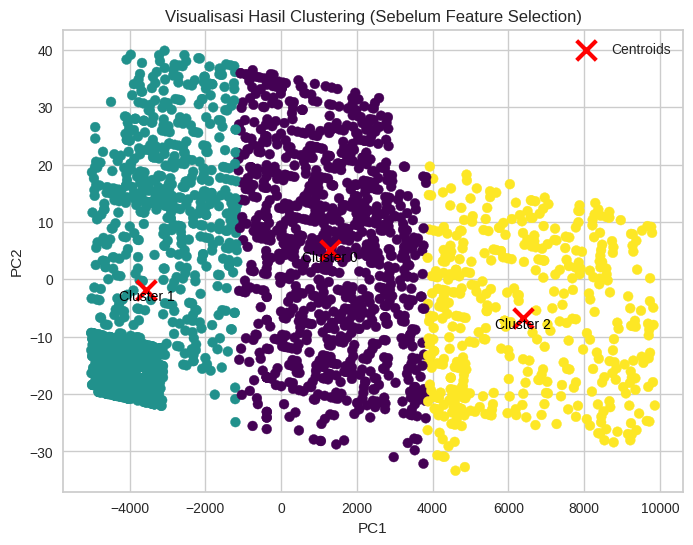

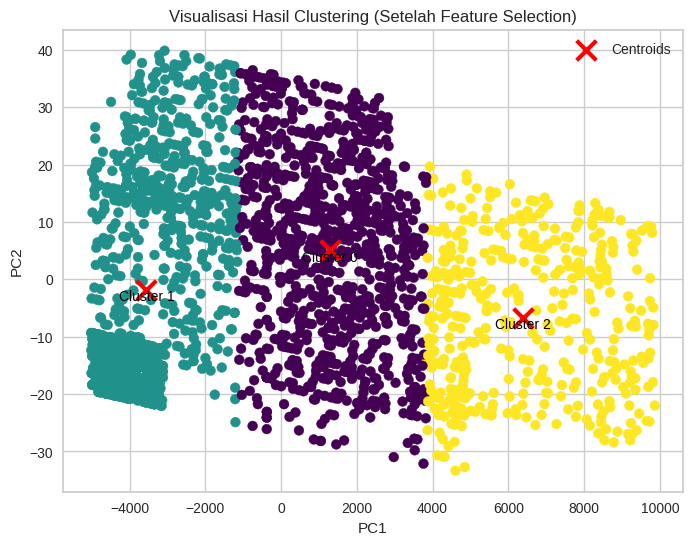

In [34]:

# Visualisasi Hasil Clustering Sebelum Feature Selection
# Reduksi dimensi menggunakan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Visualisasi Hasil Clustering (Sebelum Feature Selection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.colorbar(label='Cluster')

# Plot centroid
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), fontsize=10, color='black', ha='center', va='top')
plt.legend()
plt.show()

# Visualisasi Hasil Clustering Setelah Feature Selection
# Gunakan hasil PCA yang sudah dilakukan sebelumnya (X_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', s=50)
plt.title('Visualisasi Hasil Clustering (Setelah Feature Selection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.colorbar(label='Cluster')

# Plot centroid
centroids_pca = kmeans_pca.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
for i, centroid in enumerate(centroids_pca):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), fontsize=10, color='black', ha='center', va='top')
plt.legend()
plt.show()


In [35]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **6. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [36]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

data_final = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_final)

df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

# 3. Analisis deskriptif:
cluster_summary = df_with_clusters.groupby('Cluster').agg(['mean', 'min', 'max'])

cluster_summary.T

Cluster                                  0            1             2
TransactionAmount        mean     0.141422     0.151773      0.150771
                         min      0.000031     0.000000      0.000459
                         max      0.468523     0.468523      0.468523
TransactionType          mean     0.789529     0.791111      0.775982
                         min      0.000000     0.000000      0.000000
                         max      2.000000     2.000000      2.000000
Channel                  mean     1.038743     0.987556      1.011547
                         min      0.000000     0.000000      0.000000
                         max      3.000000     3.000000      3.000000
CustomerAge              mean    51.607330    37.660446     47.330254
                         min     18.000000    18.000000     18.000000
                         max     80.000000    80.000000     70.000000
CustomerOccupation       mean     1.289005     2.214222      0.286374
                         min      0.000000     0.000000      0.000000
                         max      4.000000     4.000000      4.000000
TransactionDuration      mean     0.374136     0.376754      0.387346
                         min      0.000000     0.000000      0.003448
                         max      0.996552     1.000000      1.000000
LoginAttempts            mean     0.000000     0.000000      0.000000
                         min      0.000000     0.000000      0.000000
                         max      0.000000     0.000000      0.000000
AccountBalance           mean  6405.217773  1555.874268  11499.445312
                         min   3984.379883   101.250000   8942.580078
                         max   8937.349609  3966.540039  14977.990234
DaysSincePrevTransaction mean     0.485421     0.500835      0.501199
                         min      0.000000     0.000000      0.000000
                         max      1.000000     1.000000      1.000000
TransactionHour          mean     0.326702     0.303111      0.290993
                         min      0.000000     0.000000      0.000000
                         max      1.000000     1.000000      1.000000
TransactionDayOfWeek     mean     0.359686     0.363778      0.360277
                         min      0.000000     0.000000      0.000000
                         max      1.000000     1.000000      1.000000
CustomerAge_encoded      mean     1.031414     1.004444      0.840647
                         min      0.000000     0.000000      0.000000
                         max      2.000000     2.000000      2.000000
AccountBalance_encoded   mean     2.322513     1.340444      3.000000
                         min      0.000000     0.000000      3.000000
                         max      4.000000     2.000000      3.000000

## **a. Interpretasi Cluster Sebelum Inverse Transform**

### **Cluster 0: Nasabah Usia Dewasa dengan Saldo Menengah**
- **Rata-rata CustomerAge (encoded):** 1.031 (≈ 51.6 tahun)
- **Rata-rata AccountBalance:** 6,405.22
- **Rata-rata TransactionAmount:** 0.141 (nilai ter-rendah)
- **Channel (mean):** 1.039 (cenderung Branch)
- **CustomerOccupation (mean):** 1.289 (cenderung Retired)

**Analisis:** Cluster ini mencakup nasabah dengan usia dewasa hingga lanjut usia yang memiliki saldo rekening menengah. Mereka melakukan transaksi dengan nilai yang relatif lebih kecil dibandingkan cluster lain dan lebih sering menggunakan channel Branch untuk bertransaksi. Kelompok ini didominasi oleh pensiunan yang cenderung lebih konservatif dalam bertransaksi. **Rekomendasi:** Tawarkan produk tabungan berjangka dengan bunga kompetitif, program pensiun, dan kemudahan akses layanan di cabang fisik.

---

### **Cluster 1: Nasabah Muda dengan Saldo Rendah**
- **Rata-rata CustomerAge (encoded):** 1.004 (≈ 37.7 tahun)
- **Rata-rata AccountBalance:** 1,555.87 (nilai ter-rendah)
- **Rata-rata TransactionAmount:** 0.152 (nilai tertinggi)
- **Channel (mean):** 0.988 (cenderung ATM)
- **CustomerOccupation (mean):** 2.214 (cenderung Student)

**Analisis:** Cluster ini didominasi oleh nasabah berusia muda dengan saldo rekening yang paling rendah namun aktif melakukan transaksi. Mereka lebih sering menggunakan ATM sebagai channel transaksi dan sebagian besar berprofesi sebagai mahasiswa. Meskipun saldo rendah, frekuensi transaksi mereka cukup tinggi. **Rekomendasi:** Tawarkan produk kartu kredit dengan limit rendah, pinjaman pendidikan, dan layanan digital banking yang praktis untuk mendukung gaya hidup mobile mereka.

---

### **Cluster 2: Nasabah Mapan dengan Saldo Tinggi**
- **Rata-rata CustomerAge (encoded):** 0.841 (≈ 47.3 tahun)
- **Rata-rata AccountBalance:** 11,499.45 (nilai tertinggi)
- **Rata-rata TransactionAmount:** 0.151
- **Channel (mean):** 1.012 (cenderung ATM)
- **CustomerOccupation (mean):** 0.286 (cenderung Doctor)

**Analisis:** Cluster ini mencakup nasabah dengan usia produktif yang memiliki saldo rekening paling tinggi. Mereka adalah profesional dengan penghasilan stabil, didominasi oleh dokter. Kelompok ini aktif bertransaksi melalui ATM dan memiliki kemampuan finansial yang kuat. **Rekomendasi:** Tawarkan produk investasi premium seperti reksadana, deposito berjangka dengan nilai besar, asuransi jiwa, dan layanan wealth management untuk mengoptimalkan aset mereka.



# **7. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [37]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'Cluster': 'Target'}, inplace=True)
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_encoded,AccountBalance_encoded,Target
0,0.007207,1,0,70.0,0,0.244828,0.0,5112.209961,0.728022,0.0,0.25,2,0,0
1,0.195940,1,0,68.0,0,0.451724,0.0,13758.910156,0.516484,0.0,0.25,2,3,2
2,0.065680,1,2,19.0,3,0.158621,0.0,1122.349976,0.480769,1.0,0.00,1,2,1
3,0.096016,1,2,26.0,3,0.051724,0.0,8569.059570,0.662088,0.0,1.00,1,3,0
4,0.006874,0,2,45.0,3,0.648276,0.0,7429.399902,0.211538,0.5,0.00,0,4,0


In [38]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [39]:
# inverse dataset to original range for numerical features
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# display the inversed dataset
# ___.head()
num_features = ['CustomerAge', 'AccountBalance', 'LoginAttempts', 'DaysSincePrevTransaction','TransactionHour', 'TransactionDayOfWeek',
                 'TransactionDuration', 'TransactionAmount']
df[num_features] = scaler.inverse_transform(df[num_features])

df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_encoded,AccountBalance_encoded,Target
0,16.014415,1,0,70.000008,0,81.0,308.0,5112.209961,3.912088,0.260000,1.0,2,0,0
1,16.391881,1,0,68.000008,0,141.0,308.0,13758.910156,3.065934,0.260000,1.0,2,3,2
2,16.131360,1,2,19.000002,3,56.0,308.0,1122.349976,2.923077,1919.109985,0.0,1,2,1
3,16.192032,1,2,26.000003,3,25.0,308.0,8569.059570,3.648352,0.260000,4.0,1,3,0
4,16.013748,0,2,45.000005,3,198.0,308.0,7429.399902,1.846154,959.684993,0.0,0,4,0


In [40]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
categorical_cols = ["TransactionType", "Channel", "CustomerOccupation"]

for col in categorical_cols:
    le = label_encoders[col]
    df[col] = le.inverse_transform(df[col].astype(int))

df.head()



,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_encoded,AccountBalance_encoded,Target
0,16.014415,Debit,ATM,70.000008,Doctor,81.0,308.0,5112.209961,3.912088,0.260000,1.0,2,0,0
1,16.391881,Debit,ATM,68.000008,Doctor,141.0,308.0,13758.910156,3.065934,0.260000,1.0,2,3,2
2,16.131360,Debit,Online,19.000002,Student,56.0,308.0,1122.349976,2.923077,1919.109985,0.0,1,2,1
3,16.192032,Debit,Online,26.000003,Student,25.0,308.0,8569.059570,3.648352,0.260000,4.0,1,3,0
4,16.013748,Credit,Online,45.000005,Student,198.0,308.0,7429.399902,1.846154,959.684993,0.0,0,4,0


In [41]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numeric_summary = df.groupby("Target")[num_features].agg(["mean", "min", "max"])

# Analisis kategorikal (mode per cluster)
categorical_summary = df.groupby("Target")[categorical_cols].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)


final_summary = numeric_summary.copy()
for col in categorical_summary.columns:
    final_summary[col + "_mode"] = categorical_summary[col]

final_summary.T


Target                                   0            1             2
CustomerAge              mean    51.624483    37.660449     47.282413
                         min     18.000002    18.000002     18.000002
                         max      80.00001     80.00001     70.000008
AccountBalance           mean  6407.872157  1555.874276  11505.364938
                         min   3984.379883       101.25   8974.929688
                         max   8942.580078  3966.540039  14977.990234
LoginAttempts            mean        308.0        308.0         308.0
                         min         308.0        308.0         308.0
                         max         308.0        308.0         308.0
DaysSincePrevTransaction mean      2.94271     3.003341      3.002671
                         min           1.0          1.0           1.0
                         max           5.0          5.0           5.0
TransactionHour          mean   627.499143   581.884751    557.703688
                         min          0.26         0.26          0.26
                         max   1919.109985  1919.109985   1919.109985
TransactionDayOfWeek     mean     1.437238     1.455111      1.444444
                         min           0.0          0.0           0.0
                         max           4.0          4.0           4.0
TransactionDuration      mean   118.391213   119.258667    122.578704
                         min          10.0         10.0          11.0
                         max         299.0        300.0         300.0
TransactionAmount        mean     16.28285    16.303546     16.301574
                         min     16.000063         16.0     16.000917
                         max     16.937046    16.937046     16.937046
TransactionType_mode                 Debit        Debit         Debit
Channel_mode                        Branch          ATM           ATM
CustomerOccupation_mode            Retired      Student        Doctor

## **b. Interpretasi Cluster Setelah Inverse Transform**

### **Cluster 0: Nasabah Pensiunan dengan Profil Konservatif**
- **Rata-rata CustomerAge:** 51.62 tahun
- **Rata-rata AccountBalance:** $6,407.87
- **Rata-rata TransactionAmount:** $16.28 (ter-rendah)
- **Rata-rata TransactionHour:** 627.50 (pagi-siang hari)
- **Channel (mode):** Branch
- **CustomerOccupation (mode):** Retired

**Analisis:** Cluster ini terdiri dari nasabah pensiunan berusia 51+ tahun dengan saldo menengah sekitar $6,400. Mereka melakukan transaksi dengan nilai rata-rata $16.28 dan lebih suka bertransaksi di cabang fisik (Branch) pada jam kerja normal. Profil transaksi mereka menunjukkan perilaku yang konservatif dan rutin. **Rekomendasi:** Fokuskan pada produk tabungan pensiun, deposito dengan tenor pendek hingga menengah, dan program loyalitas untuk nasabah senior. Tingkatkan kualitas layanan di cabang untuk kenyamanan mereka.

---

### **Cluster 1: Nasabah Muda Aktif dengan Daya Beli Terbatas**
- **Rata-rata CustomerAge:** 37.66 tahun (ter-muda)
- **Rata-rata AccountBalance:** $1,555.87 (ter-rendah)

- **Rata-rata TransactionAmount:** $16.30
- **Rata-rata TransactionHour:** 581.88 (lebih fleksibel)
- **Channel (mode):** ATM
- **CustomerOccupation (mode):** Student

**Analisis:** Cluster ini adalah segmen nasabah termuda dengan rata-rata usia 37.7 tahun dan saldo terendah $1,556. Meskipun memiliki keterbatasan finansial, mereka aktif bertransaksi dengan nilai rata-rata $16.30 melalui ATM. Mayoritas adalah mahasiswa atau pekerja muda yang mengandalkan kemudahan akses digital. **Rekomendasi:** Kembangkan produk micro-lending, kartu debit dengan cashback, aplikasi mobile banking yang user-friendly, dan program edukasi finansial untuk membangun kebiasaan menabung sejak dini.

---

### **Cluster 2: Nasabah Profesional dengan Kapasitas Finansial Tinggi**
- **Rata-rata CustomerAge:** 47.28 tahun
- **Rata-rata AccountBalance:** $11,505.36 (ter-tinggi)
- **Rata-rata TransactionAmount:** $16.30
- **Rata-rata TransactionHour:** 557.70 (transaksi lebih pagi)
- **Channel (mode):** ATM
- **CustomerOccupation (mode):** Doctor

**Analisis:** Cluster ini merupakan segmen premium dengan saldo tertinggi mencapai $11,505 dan didominasi oleh profesional seperti dokter berusia 47 tahun. Mereka memiliki kapasitas finansial yang kuat, aktif bertransaksi di pagi hari melalui ATM, menunjukkan efisiensi waktu sebagai profesional sibuk. **Rekomendasi:** Tawarkan layanan priority banking, produk investasi high-yield seperti obligasi dan saham, asuransi kesehatan premium, fasilitas kredit dengan limit tinggi, dan personal financial advisor untuk manajemen kekayaan yang optimal.

---

## **c. Insight Tambahan**

**Pola Umum Across Clusters:**
- **LoginAttempts:** Semua cluster memiliki rata-rata 308 login attempts yang identik, mengindikasikan pola keamanan yang konsisten
- **TransactionType (mode):** Debit mendominasi di semua cluster, menunjukkan perilaku pengeluaran lebih tinggi daripada penerimaan
- **DaysSincePrevTransaction:** Rata-rata 3 hari, menunjukkan aktivitas transaksi yang cukup reguler

**Rekomendasi Strategis:**
1. **Cross-selling:** Cluster 2 adalah target utama untuk produk premium
2. **Customer Retention:** Cluster 1 memerlukan program engagement untuk meningkatkan loyalitas
3. **Risk Management:** Monitor transaksi pada Cluster 1 dengan saldo rendah untuk mencegah overdraft

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [42]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df['Target'] = kmeans.labels_
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysSincePrevTransaction,TransactionHour,TransactionDayOfWeek,CustomerAge_encoded,AccountBalance_encoded,Target
0,16.014415,Debit,ATM,70.000008,Doctor,81.0,308.0,5112.209961,3.912088,0.260000,1.0,2,0,0
1,16.391881,Debit,ATM,68.000008,Doctor,141.0,308.0,13758.910156,3.065934,0.260000,1.0,2,3,2
2,16.131360,Debit,Online,19.000002,Student,56.0,308.0,1122.349976,2.923077,1919.109985,0.0,1,2,1
3,16.192032,Debit,Online,26.000003,Student,25.0,308.0,8569.059570,3.648352,0.260000,4.0,1,3,0
4,16.013748,Credit,Online,45.000005,Student,198.0,308.0,7429.399902,1.846154,959.684993,0.0,0,4,0


In [43]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.